In [1]:
import re
import sys
from time import time, sleep
from pprint import pprint
from functools import partial
from multiprocessing import Pool

import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt

FILENAME = "main.cpp"

In [2]:
!cp ../answer/{FILENAME} ./{FILENAME}

In [3]:
#!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -DONLINE_JUDGE -o {FILENAME}.out
!g++ {FILENAME} -std=gnu++17 -Wall -Wextra -O2 -o {FILENAME}.out

main.cpp:49: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
   49 | #pragma clang attribute push (__attribute__((target("arch=skylake"))),apply_to=function)
      | 
main.cpp:1640: warning: ignoring #pragma clang attribute [-Wunknown-pragmas]
 1640 | #pragma clang attribute pop
      | 
main.cpp: In function ‘void test::TestBitBoardGetSpeed()’:
main.cpp:843:9: warning: unused variable ‘t0’ [-Wunused-variable]
  843 |  double t0;
      |         ^~
main.cpp: In function ‘void globals::UpdateValueTable()’:
main.cpp:949:15: warning: unused variable ‘vm’ [-Wunused-variable]
  949 |   const auto& vm = v_modified[idx_RCSEV];
      |               ^~
main.cpp: In member function ‘void State::RecalcFutureScore()’:
main.cpp:1048:14: warning: unused variable ‘old_subscore2’ [-Wunused-variable]
 1048 |   const auto old_subscore2 = subscore2;
      |              ^~~~~~~~~~~~~
main.cpp: In function ‘void Solve()’:
main.cpp:1447:54: warning: suggest parentheses around ‘-’ in operand 

In [4]:
# テストケース生成
SEED = 0
N_TESTCASES = 500

!mkdir in
for i in range(N_TESTCASES):
    filename = f"{i:04d}.txt"
    seed = SEED + i
    !python3 ../A/tester/generator.py {seed} > ./in/{filename}
!ls in

0000.txt  0063.txt  0126.txt  0189.txt	0252.txt  0315.txt  0378.txt  0441.txt
0001.txt  0064.txt  0127.txt  0190.txt	0253.txt  0316.txt  0379.txt  0442.txt
0002.txt  0065.txt  0128.txt  0191.txt	0254.txt  0317.txt  0380.txt  0443.txt
0003.txt  0066.txt  0129.txt  0192.txt	0255.txt  0318.txt  0381.txt  0444.txt
0004.txt  0067.txt  0130.txt  0193.txt	0256.txt  0319.txt  0382.txt  0445.txt
0005.txt  0068.txt  0131.txt  0194.txt	0257.txt  0320.txt  0383.txt  0446.txt
0006.txt  0069.txt  0132.txt  0195.txt	0258.txt  0321.txt  0384.txt  0447.txt
0007.txt  0070.txt  0133.txt  0196.txt	0259.txt  0322.txt  0385.txt  0448.txt
0008.txt  0071.txt  0134.txt  0197.txt	0260.txt  0323.txt  0386.txt  0449.txt
0009.txt  0072.txt  0135.txt  0198.txt	0261.txt  0324.txt  0387.txt  0450.txt
0010.txt  0073.txt  0136.txt  0199.txt	0262.txt  0325.txt  0388.txt  0451.txt
0011.txt  0074.txt  0137.txt  0200.txt	0263.txt  0326.txt  0389.txt  0452.txt
0012.txt  0075.txt  0138.txt  0201.txt	0264.txt  0327.txt  0390.

In [5]:
TESTCASE_DIRECTORY = "./in/"
TESTCASES = [f"{i:04d}.txt" for i in range(N_TESTCASES)]

In [6]:
# もとのスコアの確認

scores = []
times = []

!mkdir out

def parallel(i):
    testcase = TESTCASES[i]
    i = f"{i:04d}"
    t0 = time()
    !./{FILENAME}.out < {TESTCASE_DIRECTORY}{testcase} > ./out/{testcase} 2> /dev/null
    t = time() - t0
    score = !python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}{testcase} ./out/{testcase}
    print(i, f"time:{t:.4f}", *score)
    score = int(score[0].split(":")[-1])
    return score, t

for i in range(200):
    score, t = parallel(i)
    scores.append(score)
    times.append(t)

# with Pool(15) as p:
#     for score, t in p.map(parallel, range(N_TESTCASES)):
#         scores.append(score)
#         times.append(t)

np.mean(scores) * 50 / 1e6, np.std(scores) * 50 / 1e6

0000 time:1.9638 score:5318089
0001 time:1.9546 score:5317741
0002 time:1.9623 score:5268966
0003 time:1.9673 score:4811451
0004 time:1.9593 score:5270970
0005 time:1.9614 score:4950461
0006 time:1.9537 score:4855028
0007 time:1.9599 score:5189752
0008 time:1.9535 score:4304115
0009 time:1.9624 score:5367966
0010 time:1.9536 score:4972274
0011 time:1.9615 score:5621823
0012 time:1.9277 score:4140019
0013 time:1.9509 score:5164987
0014 time:1.9647 score:4761101
0015 time:1.9608 score:5101680
0016 time:1.9572 score:5215143
0017 time:1.9596 score:5490711
0018 time:1.9460 score:5406908
0019 time:1.9631 score:5411769
0020 time:1.9755 score:5653055
0021 time:1.9425 score:5028007
0022 time:1.9524 score:4849942
0023 time:1.9535 score:4709567
0024 time:1.9587 score:5169077
0025 time:1.9565 score:4792684
0026 time:1.9582 score:5450799
0027 time:1.9679 score:4817573
0028 time:1.9590 score:4989301
0029 time:1.9608 score:5513570
0030 time:1.9533 score:4691211
0031 time:1.9672 score:5375975
0032 tim

(255.846914, 16.701541236574666)

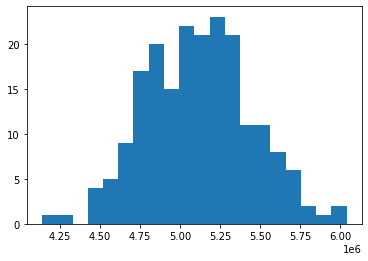

In [7]:
plt.hist(scores, bins=20)
plt.show()

In [8]:
# ここでエラー出力は何かおかしいかもしれない


# パラメータ抽出
with open(FILENAME) as f:
    answer = f.read()


variables_optimize = []

for left, value, right, options in re.findall(r"^([^/\n]*=\s*)(.+?)(\s*;\s*//(?:.*\W)?OPTIMIZE(\W.*))$", answer, re.MULTILINE):
    name = left.replace("=", "").strip().split()[-1]
    
    searched = re.search(r".*\[(?P<min>.*),(?P<max>.*)\].*", options)
    if searched:
        min_value = max_value = None
        try:
            min_value = eval(searched.group("min"))
            max_value = eval(searched.group("max"))
            assert min_value <= max_value
        except Exception as e:
            print(f"searched={searched}", file=sys.stderr)
            print(e, file=sys.stderr)
            continue
        log = "LOG" in options  # 雑、直したほうが良い
        if type(min_value) != type(max_value):
            print(f"searched={searched}", file=sys.stderr)
            print("types not matched", file=sys.stderr)
            continue
        if isinstance(min_value, int):
            method = "suggest_int"
        elif isinstance(min_value, float):
            method = "suggest_float"
        else:
            print(f"searched={searched}", file=sys.stderr)
            print(f"unknown type ({type(min_value)})", file=sys.stderr)
            continue
        variables_optimize.append({
            "name": name,
            "method": method,
            "min": min_value,
            "max": max_value,
            "log": log,
            "left": left,
            "right": right,
        })
    elif searched := re.search(r".*\{(?P<choices>.*?)\}.*", options):
        choices = list(map(lambda x: x.strip(), searched.group("choices").split(",")))
        variables_optimize.append({
            "name": name,
            "method": "suggest_categorical",
            "choices": choices,
            "left": left,
            "right": right,
        })
    else:
        print(f"searched={searched}", file=sys.stderr)
        print(f"pattern was matched but options are incorrect.", file=sys.stderr)

print(len(variables_optimize), "variables were found.")
if globals().get("pd"):
    display(pd.DataFrame(variables_optimize))
else:
    pprint(variables_optimize)

9 variables were found.


,name,method,min,max,log,left,right,choices
0,hash_table_size,suggest_int,6.000,18.000,False,constexpr int hash_table_size =,"; // OPTIMIZE [6, 18]",NaN
1,K_START,suggest_float,0.040,0.200,True,constexpr double K_START =,"; // OPTIMIZE [0.04, 0.2] LOG",NaN
2,K_END,suggest_float,0.030,0.100,True,constexpr double K_END =,"; // OPTIMIZE [0.03, 0.1] LOG",NaN
3,K_H,suggest_float,0.001,0.999,False,constexpr double K_H =,"; // OPTIMIZE [0.001, 0.999]",NaN
4,PURCHASE_TURN_LIMIT,suggest_int,790.000,870.000,False,constexpr short PURCHASE_TURN_LIMIT =,"; // OPTIMIZE [790, 870]",NaN
5,ROUGH_HASH,suggest_categorical,NaN,NaN,NaN,constexpr int ROUGH_HASH =,"; // OPTIMIZE {0, 0b00000001, 0b00010001,...","[0, 0b00000001, 0b00010001, 0b00010011, 0b0011..."
6,TARGET_BEAM_WIDTH_INCREASE_RATE,suggest_float,0.250,4.000,True,constexpr double TARGET_BEAM_WIDTH_INCREASE_RA...,"; // OPTIMIZE [0.25, 4.0] LOG",NaN
7,TARGET_BEAM_WIDTH_HALF_PROGRES_RATE,suggest_float,0.020,0.980,False,constexpr double TARGET_BEAM_WIDTH_HALF_PROGRE...,"; // OPTIMIZE [0.02, 0.98]",NaN
8,MAX_BEAM_WIDTH,suggest_int,400.000,4000.000,True,constexpr auto MAX_BEAM_WIDTH =,"; // OPTIMIZE [400, 400...",NaN


In [9]:
def escape(string):  # 正規表現の中でそのまま使いたい文字列をエスケープ
    res = !echo '{string}' | sed -e 's/[]\/$*.^[]/\\&/g'
    return res[0]

def escape_sed(string):  # sed の置換後の文字列用のエスケープ
    res = !echo '{string}' | sed -e 's/[\/&]/\\&/g'
    return res[0]


def objective_with_index(trial, n_internal_parallel):
    index_parallel = trial.number % 12  # これ変数にする
    print(f"{index_parallel=}")
    
    parameters_changed_filename = f"{index_parallel}_{FILENAME}"
    #directory_input = "./in"  # "/" をつけない  # 中のすべてのファイルに対して実行される
    
    !mkdir {index_parallel}_out 2> /dev/null
    !mkdir {index_parallel}_score 2> /dev/null
    !rm {index_parallel}_out/*
    !rm {index_parallel}_score/*
    
    # ファイル作成
    !cp {FILENAME} {parameters_changed_filename}
    sed_options = [f"-i {parameters_changed_filename}"]
    for variable in variables_optimize:
        if variable["method"] == "suggest_categorical":
            val =  trial.suggest_categorical(variable["name"], variable["choices"])
        else:
            val = getattr(trial, variable["method"])(variable["name"], variable["min"], variable["max"], log=variable["log"])
        left = variable["left"]
        right = variable["right"]
        sed_options.append(f"""-e 's/^{escape(left)}.*{escape(right)}$/{escape_sed(left)}{val}{escape_sed(right)}/'""")
    command_sed = f"sed {' '.join(sed_options)}"
    print(command_sed)
    !{command_sed}
    
    # コンパイル
    command_compile = f"g++ {parameters_changed_filename} -std=gnu++17 -O2 -DONLINE_JUDGE -o {parameters_changed_filename}.out 2> /dev/null"
    print(command_compile)
    !{command_compile}
    
    # 実行・採点コマンド (@ はファイル名)
    command_exec = (
        f"./{parameters_changed_filename}.out < {TESTCASE_DIRECTORY}@ >./{index_parallel}_out/@ 2> /dev/null;"
        f"python3 ../A/tester/judge.py {TESTCASE_DIRECTORY}@ ./{index_parallel}_out/@ > ./{index_parallel}_score/@"
        
        #f"cargo run --release --manifest-path ../tools/Cargo.toml --bin tester {directory_input}/@ $(pwd)/{parameters_changed_filename}.out 2>&1 | grep Score | sed -E s/[^0-9]+// > ./{index_parallel}_score/@;"
        
        #f"./{parameters_changed_filename}.out < {directory_input}/@ > ./{index_parallel}_out/@;"
        #f"cargo run --release --manifest-path ./tools/Cargo.toml --bin vis {directory_input}/@ ./{index_parallel}_out/@ 2> /dev/null > ./{index_parallel}_score/@;"
    )
    
    # 並列実行 (sed はパスのディレクトリ部分を消してファイル名にしてる)
    !find {TESTCASE_DIRECTORY}/* | sed 's!^.*/!!' | xargs -I@ -P {n_internal_parallel} sh -c '{command_exec}'
    
    # 集計
    file_paths = !find ./{index_parallel}_score/*
    sum_score = 0
    for file_path in file_paths:  
        with open(file_path) as f:
            sum_score += int(f.read().split(":")[-1])
    return sum_score

In [ ]:
storage_path = f"study.db"
storage = f"sqlite:///{storage_path}"
study_name = "study"
study = optuna.create_study(storage=storage, load_if_exists=True, study_name=study_name, direction="maximize")

def callback(study, trial):
    try:
        if study.best_value == trial.value:
            print(f"Updated! {study.best_value}")
            index_parallel = trial.number % 12
            parameters_changed_filename = f"{index_parallel}_{FILENAME}"
            !cp {parameters_changed_filename} 00000optimized.cpp
        print("callback ok")
    except:
        print(":(")

objective = partial(objective_with_index, n_internal_parallel=6)
study.optimize(objective, n_trials=3000, timeout=86400, n_jobs=5, callbacks=[callback])

[I 2021-09-11 08:33:20,893] A new study created in RDB with name: study


index_parallel=0
index_parallel=1index_parallel=2
index_parallel=3

index_parallel=4


/home/nagis/anaconda3/lib/python3.8/site-packages/optuna/study/study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


rm: cannot remove '3_out/*': No such file or directory
rm: cannot remove '1_out/*': No such file or directory
rm: cannot remove '0_out/*': No such file or directory
rm: cannot remove '2_out/*': No such file or directory
rm: cannot remove '4_out/*': No such file or directory
rm: cannot remove '3_score/*': No such file or directory
rm: cannot remove '2_score/*': No such file or directory
rm: cannot remove '0_score/*': No such file or directory
rm: cannot remove '1_score/*': No such file or directory
rm: cannot remove '4_score/*': No such file or directory
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 14;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.06807092224331866;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.09292488135142019;   \/

g++ 3_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 3_main.cpp.out 2> /dev/null
g++ 4_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 4_main.cpp.out 2> /dev/null
g++ 1_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 1_main.cpp.out 2> /dev/null
g++ 2_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 2_main.cpp.out 2> /dev/null


[I 2021-09-11 08:36:12,118] Trial 1 finished with value: 2407175626.0 and parameters: {'hash_table_size': 13, 'K_START': 0.04275867060773063, 'K_END': 0.06696622646441333, 'K_H': 0.5247226022118809, 'PURCHASE_TURN_LIMIT': 864, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3803283278357488, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.04255872568356722, 'MAX_BEAM_WIDTH': 1058}. Best is trial 1 with value: 2407175626.0.


Updated! 2407175626.0
callback ok
index_parallel=5
rm: cannot remove '5_out/*': No such file or directory
rm: cannot remove '5_score/*': No such file or directory


[I 2021-09-11 08:36:13,265] Trial 0 finished with value: 2416906221.0 and parameters: {'hash_table_size': 14, 'K_START': 0.06807092224331866, 'K_END': 0.09292488135142019, 'K_H': 0.2341404327943084, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2498581229801087, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.17068645526877835, 'MAX_BEAM_WIDTH': 2925}. Best is trial 0 with value: 2416906221.0.


sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1068899709632363;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061428981974008985;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.06539539127487108;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 820;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}/' -e 's/^

[I 2021-09-11 08:36:14,490] Trial 4 finished with value: 2413733531.0 and parameters: {'hash_table_size': 14, 'K_START': 0.06055456529234969, 'K_END': 0.04581689732827751, 'K_H': 0.14002926471348368, 'PURCHASE_TURN_LIMIT': 809, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8205044861474348, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.07798249916195119, 'MAX_BEAM_WIDTH': 3613}. Best is trial 0 with value: 2416906221.0.


callback ok
index_parallel=7
g++ 6_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 6_main.cpp.out 2> /dev/null


[I 2021-09-11 08:36:14,613] Trial 2 finished with value: 2477988185.0 and parameters: {'hash_table_size': 10, 'K_START': 0.10426352948467443, 'K_END': 0.038026594416793146, 'K_H': 0.35510264992770973, 'PURCHASE_TURN_LIMIT': 856, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.6498690099347892, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7076816509911605, 'MAX_BEAM_WIDTH': 416}. Best is trial 2 with value: 2477988185.0.


Updated! 2477988185.0
callback ok
rm: cannot remove '7_out/*': No such file or directory
index_parallel=8
rm: cannot remove '7_score/*': No such file or directory
rm: cannot remove '8_out/*': No such file or directory
rm: cannot remove '8_score/*': No such file or directory
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 16;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.186525121047278;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.036857435099326756;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6756103140479789;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_T

[I 2021-09-11 08:36:21,960] Trial 3 finished with value: 2401345398.0 and parameters: {'hash_table_size': 15, 'K_START': 0.06881998152773426, 'K_END': 0.07724577463311852, 'K_H': 0.8674802227362403, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3431137444377818, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3634958450214391, 'MAX_BEAM_WIDTH': 3414}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=9
rm: cannot remove '9_out/*': No such file or directory
rm: cannot remove '9_score/*': No such file or directory
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 15;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09268191400670374;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050352709086285724;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.047205701197540854;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 793;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 

[I 2021-09-11 08:38:59,154] Trial 7 finished with value: 2376545982.0 and parameters: {'hash_table_size': 16, 'K_START': 0.186525121047278, 'K_END': 0.036857435099326756, 'K_H': 0.6756103140479789, 'PURCHASE_TURN_LIMIT': 793, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.196224657337636, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.06528397574380491, 'MAX_BEAM_WIDTH': 2435}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=10
rm: cannot remove '10_out/*': No such file or directory
rm: cannot remove '10_score/*': No such file or directory
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 14;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08622606134077246;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0650626755982592;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5028719027290132;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 790;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 

[I 2021-09-11 08:39:05,376] Trial 8 finished with value: 2413262720.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1632616716114168, 'K_END': 0.09872126278083565, 'K_H': 0.9630479690871496, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8925632843845688, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.19720081844862927, 'MAX_BEAM_WIDTH': 695}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=11
rm: cannot remove '11_out/*': No such file or directory
rm: cannot remove '11_score/*': No such file or directory


[I 2021-09-11 08:39:06,454] Trial 6 finished with value: 2441847362.0 and parameters: {'hash_table_size': 11, 'K_START': 0.07628248168679232, 'K_END': 0.038035625618298, 'K_H': 0.04505729570153712, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.162569995164597, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9595858900620245, 'MAX_BEAM_WIDTH': 1796}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=0
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07684134483329999;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04390160787814069;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.956363014463276;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 08:39:17,802] Trial 5 finished with value: 2357145875.0 and parameters: {'hash_table_size': 9, 'K_START': 0.1068899709632363, 'K_END': 0.061428981974008985, 'K_H': 0.06539539127487108, 'PURCHASE_TURN_LIMIT': 820, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.28093161364803565, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6563176190401669, 'MAX_BEAM_WIDTH': 2188}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 13;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14342329833141274;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046279456984850934;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1617133755135235;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 859;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:39:27,175] Trial 9 finished with value: 2381342432.0 and parameters: {'hash_table_size': 15, 'K_START': 0.09268191400670374, 'K_END': 0.050352709086285724, 'K_H': 0.047205701197540854, 'PURCHASE_TURN_LIMIT': 793, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4342067461240067, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.45475373678475717, 'MAX_BEAM_WIDTH': 1022}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13619118153910278;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.030180818835586955;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3503769622213806;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 870;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 08:41:03,189] Trial 14 finished with value: 2392891115.0 and parameters: {'hash_table_size': 6, 'K_START': 0.13619118153910278, 'K_END': 0.030180818835586955, 'K_H': 0.3503769622213806, 'PURCHASE_TURN_LIMIT': 870, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.8727318102264956, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.755537180360331, 'MAX_BEAM_WIDTH': 405}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.108587455210786;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.039796677237475646;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43400538122987303;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 855;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:41:49,760] Trial 10 finished with value: 2407396317.0 and parameters: {'hash_table_size': 14, 'K_START': 0.08622606134077246, 'K_END': 0.0650626755982592, 'K_H': 0.5028719027290132, 'PURCHASE_TURN_LIMIT': 790, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.58576748006901, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5207426753897644, 'MAX_BEAM_WIDTH': 1447}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11723144592933699;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04053057544249275;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.32706040558777183;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 854;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:41:52,617] Trial 12 finished with value: 2469469634.0 and parameters: {'hash_table_size': 7, 'K_START': 0.04646577500888546, 'K_END': 0.06713467633869764, 'K_H': 0.7756295556342697, 'PURCHASE_TURN_LIMIT': 857, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0647381818736723, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.892697130621379, 'MAX_BEAM_WIDTH': 2449}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 18;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.044318949182999785;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04365469559799115;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7638941740390979;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 855;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:41:57,871] Trial 11 finished with value: 2458695822.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07684134483329999, 'K_END': 0.04390160787814069, 'K_H': 0.956363014463276, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8672196136256404, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7869621680397061, 'MAX_BEAM_WIDTH': 1334}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 18;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.04012320189643151;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056202479818316546;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7029798128554265;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 857;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:42:12,473] Trial 13 finished with value: 2422064160.0 and parameters: {'hash_table_size': 13, 'K_START': 0.14342329833141274, 'K_END': 0.046279456984850934, 'K_H': 0.1617133755135235, 'PURCHASE_TURN_LIMIT': 859, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.544312876198336, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5967408997098733, 'MAX_BEAM_WIDTH': 1305}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 18;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.040085471696386724;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.08013799823323714;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7151185356033114;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 853;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:43:56,474] Trial 15 finished with value: 2459034281.0 and parameters: {'hash_table_size': 11, 'K_START': 0.108587455210786, 'K_END': 0.039796677237475646, 'K_H': 0.43400538122987303, 'PURCHASE_TURN_LIMIT': 855, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.6333996152449126, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9702322173929896, 'MAX_BEAM_WIDTH': 1501}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.04087763951176289;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05526963807638939;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6849675626317571;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 852;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 08:44:43,296] Trial 16 finished with value: 2457793167.0 and parameters: {'hash_table_size': 11, 'K_START': 0.11723144592933699, 'K_END': 0.04053057544249275, 'K_H': 0.32706040558777183, 'PURCHASE_TURN_LIMIT': 854, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.772102801640419, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.965299130385125, 'MAX_BEAM_WIDTH': 419}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 18;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.04189161203160743;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03140821581617526;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7050074122729306;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 847;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 08:44:46,895] Trial 17 finished with value: 2425271548.0 and parameters: {'hash_table_size': 18, 'K_START': 0.044318949182999785, 'K_END': 0.04365469559799115, 'K_H': 0.7638941740390979, 'PURCHASE_TURN_LIMIT': 855, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5075102204035463, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9265270215373956, 'MAX_BEAM_WIDTH': 420}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.057953115730722836;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055651418424916076;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6377718454718965;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 870;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011

[I 2021-09-11 08:44:52,259] Trial 18 finished with value: 2430909764.0 and parameters: {'hash_table_size': 18, 'K_START': 0.04012320189643151, 'K_END': 0.056202479818316546, 'K_H': 0.7029798128554265, 'PURCHASE_TURN_LIMIT': 857, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5053867075314945, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9661447440117538, 'MAX_BEAM_WIDTH': 414}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.05790773027239988;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.032374383624002336;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6028749756985716;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 870;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 08:45:06,728] Trial 19 finished with value: 2412680985.0 and parameters: {'hash_table_size': 18, 'K_START': 0.040085471696386724, 'K_END': 0.08013799823323714, 'K_H': 0.7151185356033114, 'PURCHASE_TURN_LIMIT': 853, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5026662817158927, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.968030177341278, 'MAX_BEAM_WIDTH': 454}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.05077789298780168;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.030863147596575203;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6115847535321858;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 869;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 08:45:25,233] Trial 20 finished with value: 2417817456.0 and parameters: {'hash_table_size': 6, 'K_START': 0.04087763951176289, 'K_END': 0.05526963807638939, 'K_H': 0.6849675626317571, 'PURCHASE_TURN_LIMIT': 852, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.486689180278967, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8381657755010405, 'MAX_BEAM_WIDTH': 406}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0540886004851094;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.030716851435180763;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39051114154714744;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 867;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 08:46:20,646] Trial 22 finished with value: 2393372369.0 and parameters: {'hash_table_size': 6, 'K_START': 0.057953115730722836, 'K_END': 0.055651418424916076, 'K_H': 0.6377718454718965, 'PURCHASE_TURN_LIMIT': 870, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5237825844365948, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8094421401725915, 'MAX_BEAM_WIDTH': 640}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1033278042061426;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.031140992144907887;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35283581002262265;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:46:25,786] Trial 23 finished with value: 2356231764.0 and parameters: {'hash_table_size': 6, 'K_START': 0.05790773027239988, 'K_END': 0.032374383624002336, 'K_H': 0.6028749756985716, 'PURCHASE_TURN_LIMIT': 870, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6649566715259737, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7920213068657054, 'MAX_BEAM_WIDTH': 632}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11107424693098741;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.034558899122749974;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.36005292773186043;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:46:39,377] Trial 24 finished with value: 2341651480.0 and parameters: {'hash_table_size': 6, 'K_START': 0.05077789298780168, 'K_END': 0.030863147596575203, 'K_H': 0.6115847535321858, 'PURCHASE_TURN_LIMIT': 869, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.8220850102865787, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8126343700005936, 'MAX_BEAM_WIDTH': 657}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10757292061233638;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.034715925930577284;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3596392919433321;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:47:37,161] Trial 21 finished with value: 2389904916.0 and parameters: {'hash_table_size': 18, 'K_START': 0.04189161203160743, 'K_END': 0.03140821581617526, 'K_H': 0.7050074122729306, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5543569256841354, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8162258617131718, 'MAX_BEAM_WIDTH': 568}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10703440089075818;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.035277001125664065;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3962117206688314;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:48:19,321] Trial 25 finished with value: 2415063006.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0540886004851094, 'K_END': 0.030716851435180763, 'K_H': 0.39051114154714744, 'PURCHASE_TURN_LIMIT': 867, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.9975182671979574, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8448051475805187, 'MAX_BEAM_WIDTH': 715}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10619459197119711;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03481151147011077;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41375114243491923;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:49:14,151] Trial 26 finished with value: 2466499160.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1033278042061426, 'K_END': 0.031140992144907887, 'K_H': 0.35283581002262265, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.137396125707775, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6939404168123842, 'MAX_BEAM_WIDTH': 1821}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08969157430678748;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03427177709004813;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2631349909905062;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 08:49:19,794] Trial 27 finished with value: 2471174907.0 and parameters: {'hash_table_size': 8, 'K_START': 0.11107424693098741, 'K_END': 0.034558899122749974, 'K_H': 0.36005292773186043, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.070350823557801, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.688169437968051, 'MAX_BEAM_WIDTH': 1734}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1324029906355862;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03599021095083762;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.24431481855701534;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 862;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:49:32,632] Trial 28 finished with value: 2475413194.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10757292061233638, 'K_END': 0.034715925930577284, 'K_H': 0.3596392919433321, 'PURCHASE_TURN_LIMIT': 845, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.8704426069704776, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6779674899633639, 'MAX_BEAM_WIDTH': 1772}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12525012316127757;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03531638338884746;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2398915714995286;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:50:31,009] Trial 29 finished with value: 2470760113.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10703440089075818, 'K_END': 0.035277001125664065, 'K_H': 0.3962117206688314, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.196802385798727, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6897849976105311, 'MAX_BEAM_WIDTH': 1708}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12422447337638902;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03535479721214386;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2624760774304772;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 08:51:12,230] Trial 30 finished with value: 2467661710.0 and parameters: {'hash_table_size': 11, 'K_START': 0.10619459197119711, 'K_END': 0.03481151147011077, 'K_H': 0.41375114243491923, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.259860784053977, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.687429736829914, 'MAX_BEAM_WIDTH': 1750}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12437049076203509;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03491839499922065;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2560624153396467;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:52:08,632] Trial 31 finished with value: 2463635468.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08969157430678748, 'K_END': 0.03427177709004813, 'K_H': 0.2631349909905062, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1788289295918057, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6782232317899405, 'MAX_BEAM_WIDTH': 1860}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1220203712418777;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.035070049534091444;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2629555837960959;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:52:14,714] Trial 32 finished with value: 2426935595.0 and parameters: {'hash_table_size': 10, 'K_START': 0.1324029906355862, 'K_END': 0.03599021095083762, 'K_H': 0.24431481855701534, 'PURCHASE_TURN_LIMIT': 862, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2190619405575491, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6797076058534226, 'MAX_BEAM_WIDTH': 947}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12233868815176696;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.040346520576267544;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47201262603342;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 08:52:26,275] Trial 33 finished with value: 2470526937.0 and parameters: {'hash_table_size': 10, 'K_START': 0.12525012316127757, 'K_END': 0.03531638338884746, 'K_H': 0.2398915714995286, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6862365284755843, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5898755858946203, 'MAX_BEAM_WIDTH': 936}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.15293435670017985;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04042490791646496;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4545580209343393;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 08:53:23,296] Trial 34 finished with value: 2472817923.0 and parameters: {'hash_table_size': 10, 'K_START': 0.12422447337638902, 'K_END': 0.03535479721214386, 'K_H': 0.2624760774304772, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.675671368623892, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5663507323656523, 'MAX_BEAM_WIDTH': 837}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.15131506782989626;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04038953349514528;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.16958776878478948;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:54:05,414] Trial 35 finished with value: 2475855142.0 and parameters: {'hash_table_size': 9, 'K_START': 0.12437049076203509, 'K_END': 0.03491839499922065, 'K_H': 0.2560624153396467, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.7573735220829327, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6238846517839788, 'MAX_BEAM_WIDTH': 1001}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09437596153977461;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.040544233968921185;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.16987560913805277;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 08:55:01,157] Trial 36 finished with value: 2468430871.0 and parameters: {'hash_table_size': 10, 'K_START': 0.1220203712418777, 'K_END': 0.035070049534091444, 'K_H': 0.2629555837960959, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6540550850652236, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5513749227038073, 'MAX_BEAM_WIDTH': 1052}. Best is trial 2 with value: 2477988185.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.15691004237777068;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03962497191403034;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.16968556711626276;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 822;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:55:07,375] Trial 37 finished with value: 2479502803.0 and parameters: {'hash_table_size': 9, 'K_START': 0.12233868815176696, 'K_END': 0.040346520576267544, 'K_H': 0.47201262603342, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.7174729382503406, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5896535904181194, 'MAX_BEAM_WIDTH': 887}. Best is trial 37 with value: 2479502803.0.


Updated! 2479502803.0
callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1542259229964802;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04016683485950392;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46433866645381094;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000

[I 2021-09-11 08:55:31,824] Trial 38 finished with value: 2470537193.0 and parameters: {'hash_table_size': 9, 'K_START': 0.15293435670017985, 'K_END': 0.04042490791646496, 'K_H': 0.4545580209343393, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.6884947394197605, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.45066123519454737, 'MAX_BEAM_WIDTH': 2682}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09704017706996938;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.038094577337297424;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.1543757580431904;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 820;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:56:10,978] Trial 39 finished with value: 2419955171.0 and parameters: {'hash_table_size': 9, 'K_START': 0.15131506782989626, 'K_END': 0.04038953349514528, 'K_H': 0.16958776878478948, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.809924504425409, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.40426323151161514, 'MAX_BEAM_WIDTH': 2137}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09903622222276291;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050658156565845026;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5448576536989878;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 816;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:57:10,443] Trial 40 finished with value: 2454790087.0 and parameters: {'hash_table_size': 10, 'K_START': 0.09437596153977461, 'K_END': 0.040544233968921185, 'K_H': 0.16987560913805277, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.5469059576126603, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.4246797269654543, 'MAX_BEAM_WIDTH': 800}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1749036396744568;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.037959364720503576;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5522714746787666;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 822;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:58:06,239] Trial 41 finished with value: 2434141839.0 and parameters: {'hash_table_size': 12, 'K_START': 0.15691004237777068, 'K_END': 0.03962497191403034, 'K_H': 0.16968556711626276, 'PURCHASE_TURN_LIMIT': 822, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.04133080687998, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.47941674660697586, 'MAX_BEAM_WIDTH': 840}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1713893627137343;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03763963835946943;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5543144221362645;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 813;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 08:58:11,071] Trial 42 finished with value: 2457890322.0 and parameters: {'hash_table_size': 9, 'K_START': 0.1542259229964802, 'K_END': 0.04016683485950392, 'K_H': 0.46433866645381094, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.0987757646416307, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.43547036477558987, 'MAX_BEAM_WIDTH': 1180}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.18621110739994803;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04948190108399949;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5441408072483014;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 813;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 08:58:19,247] Trial 43 finished with value: 2425848863.0 and parameters: {'hash_table_size': 12, 'K_START': 0.09704017706996938, 'K_END': 0.038094577337297424, 'K_H': 0.1543757580431904, 'PURCHASE_TURN_LIMIT': 820, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.1664570619326007, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3267760401568058, 'MAX_BEAM_WIDTH': 3200}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1776796681594203;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04942825297371903;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5434004267164798;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 848;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 08:58:55,527] Trial 44 finished with value: 2454069300.0 and parameters: {'hash_table_size': 12, 'K_START': 0.09903622222276291, 'K_END': 0.050658156565845026, 'K_H': 0.5448576536989878, 'PURCHASE_TURN_LIMIT': 816, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.132183426255565, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.29402238751871795, 'MAX_BEAM_WIDTH': 1176}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17049294462041886;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03273089071530137;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3052876757897061;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 847;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 08:59:54,971] Trial 45 finished with value: 2462613341.0 and parameters: {'hash_table_size': 12, 'K_START': 0.1749036396744568, 'K_END': 0.037959364720503576, 'K_H': 0.5522714746787666, 'PURCHASE_TURN_LIMIT': 822, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.1474606384796786, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.311641581031851, 'MAX_BEAM_WIDTH': 1145}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07976598461069331;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03278092350140193;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.30077568613341743;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 847;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:00:24,837] Trial 47 finished with value: 2433514028.0 and parameters: {'hash_table_size': 7, 'K_START': 0.18621110739994803, 'K_END': 0.04948190108399949, 'K_H': 0.5441408072483014, 'PURCHASE_TURN_LIMIT': 813, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.245899869855058, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3175383869880197, 'MAX_BEAM_WIDTH': 530}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08263262083132258;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0327960889195669;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3039284331979714;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 847;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:00:29,440] Trial 46 finished with value: 2446727772.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1713893627137343, 'K_END': 0.03763963835946943, 'K_H': 0.5543144221362645, 'PURCHASE_TURN_LIMIT': 813, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.0992534927648463, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6097765502892073, 'MAX_BEAM_WIDTH': 1130}. Best is trial 37 with value: 2479502803.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08012619569056281;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03287167250170602;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3045828113573052;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 849;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:00:47,748] Trial 48 finished with value: 2504521759.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1776796681594203, 'K_END': 0.04942825297371903, 'K_H': 0.5434004267164798, 'PURCHASE_TURN_LIMIT': 848, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.354594841984057, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.610050020021901, 'MAX_BEAM_WIDTH': 555}. Best is trial 48 with value: 2504521759.0.


Updated! 2504521759.0
callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07827996020458668;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04407755149796071;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.30789403716771224;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 848;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b0000

[I 2021-09-11 09:01:20,411] Trial 49 finished with value: 2467937084.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17049294462041886, 'K_END': 0.03273089071530137, 'K_H': 0.3052876757897061, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3867537519475512, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6210028357723474, 'MAX_BEAM_WIDTH': 534}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08216432921592753;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04378808479664448;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.502402251119445;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 851;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:02:21,874] Trial 50 finished with value: 2465006848.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07976598461069331, 'K_END': 0.03278092350140193, 'K_H': 0.30077568613341743, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.373687555160638, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6124716909497205, 'MAX_BEAM_WIDTH': 484}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13635366379171449;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04352673705899814;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.10778404945166048;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:02:56,674] Trial 51 finished with value: 2466191917.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08263262083132258, 'K_END': 0.0327960889195669, 'K_H': 0.3039284331979714, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3086607385553914, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.591541709102328, 'MAX_BEAM_WIDTH': 786}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11634357239027143;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04468280070055916;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5030076536653036;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:03:19,187] Trial 53 finished with value: 2502674868.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07827996020458668, 'K_END': 0.04407755149796071, 'K_H': 0.30789403716771224, 'PURCHASE_TURN_LIMIT': 848, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3213809753387713, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7360674141146099, 'MAX_BEAM_WIDTH': 495}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11475918230449338;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04353007171119385;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48525517196331835;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 851;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:03:22,070] Trial 52 finished with value: 2457949022.0 and parameters: {'hash_table_size': 10, 'K_START': 0.08012619569056281, 'K_END': 0.03287167250170602, 'K_H': 0.3045828113573052, 'PURCHASE_TURN_LIMIT': 849, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.35576662245698, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7463237020327718, 'MAX_BEAM_WIDTH': 805}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.06491767096731904;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04693546760947596;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.0974911761447795;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 860;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:04:13,999] Trial 54 finished with value: 2464701089.0 and parameters: {'hash_table_size': 9, 'K_START': 0.08216432921592753, 'K_END': 0.04378808479664448, 'K_H': 0.502402251119445, 'PURCHASE_TURN_LIMIT': 851, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9796725456152011, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7338162673478031, 'MAX_BEAM_WIDTH': 1407}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07127757247642715;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04690533366254853;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4821224795933706;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 861;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:05:14,547] Trial 55 finished with value: 2452727975.0 and parameters: {'hash_table_size': 10, 'K_START': 0.13635366379171449, 'K_END': 0.04352673705899814, 'K_H': 0.10778404945166048, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9923945380641854, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5459507301475763, 'MAX_BEAM_WIDTH': 879}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1992989636525226;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046975215381463015;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.21134737646187804;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 859;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:05:49,999] Trial 56 finished with value: 2486081964.0 and parameters: {'hash_table_size': 9, 'K_START': 0.11634357239027143, 'K_END': 0.04468280070055916, 'K_H': 0.5030076536653036, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0087339006536828, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7440665641612118, 'MAX_BEAM_WIDTH': 901}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.06921694024276741;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04717282165808276;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4725130701844021;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 861;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:06:11,985] Trial 57 finished with value: 2478998127.0 and parameters: {'hash_table_size': 9, 'K_START': 0.11475918230449338, 'K_END': 0.04353007171119385, 'K_H': 0.48525517196331835, 'PURCHASE_TURN_LIMIT': 851, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0698762566157642, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7478993170355803, 'MAX_BEAM_WIDTH': 580}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11700500530272658;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04692086130718251;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4745175712474932;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 861;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:06:15,822] Trial 58 finished with value: 2449733937.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06491767096731904, 'K_END': 0.04693546760947596, 'K_H': 0.0974911761447795, 'PURCHASE_TURN_LIMIT': 860, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0251422103228625, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7448082131887728, 'MAX_BEAM_WIDTH': 491}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07140656304997045;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052176888266692215;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4998037261975542;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 865;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:07:08,128] Trial 59 finished with value: 2451977117.0 and parameters: {'hash_table_size': 9, 'K_START': 0.07127757247642715, 'K_END': 0.04690533366254853, 'K_H': 0.4821224795933706, 'PURCHASE_TURN_LIMIT': 861, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0870959705804724, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6440691758520695, 'MAX_BEAM_WIDTH': 466}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11440401409222509;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05223840418587991;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6049306181778302;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:08:08,053] Trial 60 finished with value: 2438309854.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1992989636525226, 'K_END': 0.046975215381463015, 'K_H': 0.21134737646187804, 'PURCHASE_TURN_LIMIT': 859, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.5539756814892134, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.64897005428875, 'MAX_BEAM_WIDTH': 466}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11594531101216926;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05178269872864005;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.42597104507477557;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:08:43,261] Trial 61 finished with value: 2444058129.0 and parameters: {'hash_table_size': 9, 'K_START': 0.06921694024276741, 'K_END': 0.04717282165808276, 'K_H': 0.4725130701844021, 'PURCHASE_TURN_LIMIT': 861, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7128776956012094, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5110531262128749, 'MAX_BEAM_WIDTH': 462}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13927855688559684;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052585083809647944;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4225519134862672;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:09:05,250] Trial 62 finished with value: 2438613884.0 and parameters: {'hash_table_size': 11, 'K_START': 0.11700500530272658, 'K_END': 0.04692086130718251, 'K_H': 0.4745175712474932, 'PURCHASE_TURN_LIMIT': 861, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7503520309666878, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8698800438310078, 'MAX_BEAM_WIDTH': 581}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11670417188191033;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04212567766090131;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5924114426863006;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:09:09,658] Trial 63 finished with value: 2424843097.0 and parameters: {'hash_table_size': 11, 'K_START': 0.07140656304997045, 'K_END': 0.052176888266692215, 'K_H': 0.4998037261975542, 'PURCHASE_TURN_LIMIT': 865, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7725410766637583, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8720981671213295, 'MAX_BEAM_WIDTH': 573}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11471428593364015;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04288367942953289;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5898402806379436;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 803;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:10:00,700] Trial 64 finished with value: 2471652708.0 and parameters: {'hash_table_size': 11, 'K_START': 0.11440401409222509, 'K_END': 0.05223840418587991, 'K_H': 0.6049306181778302, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.740227242642535, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.897319520660945, 'MAX_BEAM_WIDTH': 567}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1439612044817291;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.041971088318799;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43379580618016034;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 801;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00

[I 2021-09-11 09:11:00,757] Trial 65 finished with value: 2480765986.0 and parameters: {'hash_table_size': 9, 'K_START': 0.11594531101216926, 'K_END': 0.05178269872864005, 'K_H': 0.42597104507477557, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8156329338345405, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8741430065176817, 'MAX_BEAM_WIDTH': 600}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 13;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10031031753167309;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04206283265172869;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4139408358543834;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 850;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 09:11:31,511] Trial 68 finished with value: 2451901534.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11471428593364015, 'K_END': 0.04288367942953289, 'K_H': 0.5898402806379436, 'PURCHASE_TURN_LIMIT': 803, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1582310654384569, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7209763629221715, 'MAX_BEAM_WIDTH': 680}. Best is trial 48 with value: 2504521759.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10222001163396811;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06187501461999489;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.42713353230490053;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 851;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 09:11:33,723] Trial 67 finished with value: 2506909330.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11670417188191033, 'K_END': 0.04212567766090131, 'K_H': 0.5924114426863006, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1615542094283224, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7865581250842651, 'MAX_BEAM_WIDTH': 672}. Best is trial 67 with value: 2506909330.0.


Updated! 2506909330.0
callback ok
index_parallel=0


[I 2021-09-11 09:11:34,493] Trial 66 finished with value: 2480017066.0 and parameters: {'hash_table_size': 11, 'K_START': 0.13927855688559684, 'K_END': 0.052585083809647944, 'K_H': 0.4225519134862672, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4990139047928983, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7274166287282595, 'MAX_BEAM_WIDTH': 590}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=1
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13013459833904997;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05972638249780524;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4260037847262012;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:12:20,304] Trial 69 finished with value: 2458976974.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1439612044817291, 'K_END': 0.041971088318799, 'K_H': 0.43379580618016034, 'PURCHASE_TURN_LIMIT': 801, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9256889893939592, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7195550863045561, 'MAX_BEAM_WIDTH': 734}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13269799778554683;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05903023609530177;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3824334253032731;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 824;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:13:08,004] Trial 72 finished with value: 2442984573.0 and parameters: {'hash_table_size': 6, 'K_START': 0.13013459833904997, 'K_END': 0.05972638249780524, 'K_H': 0.4260037847262012, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8723834753683818, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7722594002500962, 'MAX_BEAM_WIDTH': 735}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 13;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1417612236953444;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05880532148178463;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6580219685119518;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:13:55,031] Trial 74 finished with value: 2434337112.0 and parameters: {'hash_table_size': 6, 'K_START': 0.13269799778554683, 'K_END': 0.05903023609530177, 'K_H': 0.3824334253032731, 'PURCHASE_TURN_LIMIT': 824, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8671474035410341, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9353203036451362, 'MAX_BEAM_WIDTH': 751}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=4


[I 2021-09-11 09:13:55,471] Trial 70 finished with value: 2456636727.0 and parameters: {'hash_table_size': 13, 'K_START': 0.10031031753167309, 'K_END': 0.04206283265172869, 'K_H': 0.4139408358543834, 'PURCHASE_TURN_LIMIT': 850, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8757828931847657, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7774017292862014, 'MAX_BEAM_WIDTH': 717}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=5
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14224115333680212;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04503357353117771;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6420273160370098;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:14:24,748] Trial 71 finished with value: 2466043188.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10222001163396811, 'K_END': 0.06187501461999489, 'K_H': 0.42713353230490053, 'PURCHASE_TURN_LIMIT': 851, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9257583368018699, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7858393347743539, 'MAX_BEAM_WIDTH': 713}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09033748005287909;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.044858232385200494;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5162865904265186;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:14:27,489] Trial 73 finished with value: 2462540909.0 and parameters: {'hash_table_size': 13, 'K_START': 0.132594282637132, 'K_END': 0.05840906440245278, 'K_H': 0.6476727098453169, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9045429285678557, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7772184141016809, 'MAX_BEAM_WIDTH': 743}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1461360101589506;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.044843841917304006;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5261894295455383;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:16:00,417] Trial 75 finished with value: 2467882172.0 and parameters: {'hash_table_size': 13, 'K_START': 0.1417612236953444, 'K_END': 0.05880532148178463, 'K_H': 0.6580219685119518, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.5397045845408996, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9216328713645778, 'MAX_BEAM_WIDTH': 616}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08763037260193268;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04555025358912569;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5797596672187327;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:16:48,418] Trial 77 finished with value: 2470145951.0 and parameters: {'hash_table_size': 15, 'K_START': 0.14326926312642815, 'K_END': 0.04878814046115559, 'K_H': 0.6433056787139818, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.5229679836834416, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8189399939852797, 'MAX_BEAM_WIDTH': 595}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 16;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12300842885976918;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04548862889636417;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5206105241309267;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:16:50,807] Trial 76 finished with value: 2473611190.0 and parameters: {'hash_table_size': 8, 'K_START': 0.14224115333680212, 'K_END': 0.04503357353117771, 'K_H': 0.6420273160370098, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6414812541332718, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8382825998185612, 'MAX_BEAM_WIDTH': 638}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11878100160663704;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052684302467438875;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5789821048985124;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 09:17:16,926] Trial 78 finished with value: 2493938033.0 and parameters: {'hash_table_size': 8, 'K_START': 0.09033748005287909, 'K_END': 0.044858232385200494, 'K_H': 0.5162865904265186, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4996069985259342, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8473001193689539, 'MAX_BEAM_WIDTH': 640}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08992460101521717;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052886930072067184;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5749968234703566;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 09:17:19,947] Trial 79 finished with value: 2502149264.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1461360101589506, 'K_END': 0.044843841917304006, 'K_H': 0.5261894295455383, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4676999397178938, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8444248148529082, 'MAX_BEAM_WIDTH': 618}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 16;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08988803219668612;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05331101086454631;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5887485784488231;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:18:56,350] Trial 80 finished with value: 2473309970.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08763037260193268, 'K_END': 0.04555025358912569, 'K_H': 0.5797596672187327, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6426267963705751, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8373473498233417, 'MAX_BEAM_WIDTH': 524}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 17;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11955496213741891;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053378643157445914;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5283264131207795;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:19:40,902] Trial 81 finished with value: 2463897060.0 and parameters: {'hash_table_size': 16, 'K_START': 0.12300842885976918, 'K_END': 0.04548862889636417, 'K_H': 0.5206105241309267, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1184184353187905, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8403047277152471, 'MAX_BEAM_WIDTH': 515}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10976668397083951;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05133582394448615;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5211554198873922;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:19:43,766] Trial 82 finished with value: 2495664263.0 and parameters: {'hash_table_size': 8, 'K_START': 0.11878100160663704, 'K_END': 0.052684302467438875, 'K_H': 0.5789821048985124, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0858064380012133, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7069769553036945, 'MAX_BEAM_WIDTH': 529}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1631147857517087;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05338189833997331;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.738725312151072;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 09:20:10,055] Trial 83 finished with value: 2488562615.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08992460101521717, 'K_END': 0.052886930072067184, 'K_H': 0.5749968234703566, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2423998293242637, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8498974598548045, 'MAX_BEAM_WIDTH': 534}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09587385348303797;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05447277657392906;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.569081211239555;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:20:13,651] Trial 84 finished with value: 2465555278.0 and parameters: {'hash_table_size': 16, 'K_START': 0.08988803219668612, 'K_END': 0.05331101086454631, 'K_H': 0.5887485784488231, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2459167034460774, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8641415064159174, 'MAX_BEAM_WIDTH': 536}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09307067592163201;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049377852223227436;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5223282331790361;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:21:49,330] Trial 85 finished with value: 2461198052.0 and parameters: {'hash_table_size': 17, 'K_START': 0.11955496213741891, 'K_END': 0.053378643157445914, 'K_H': 0.5283264131207795, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.273176565637532, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8876887308293404, 'MAX_BEAM_WIDTH': 684}. Best is trial 67 with value: 2506909330.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1622987213411103;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04839919779779441;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6213392237682104;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:22:06,176] Trial 86 finished with value: 2511481094.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10976668397083951, 'K_END': 0.05133582394448615, 'K_H': 0.5211554198873922, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.274457070631236, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8791092120567561, 'MAX_BEAM_WIDTH': 680}. Best is trial 86 with value: 2511481094.0.


Updated! 2511481094.0
callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09254596762024211;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04834756530155932;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.0033504233304341713;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00

[I 2021-09-11 09:22:10,552] Trial 87 finished with value: 2513246372.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1631147857517087, 'K_END': 0.05338189833997331, 'K_H': 0.738725312151072, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4682672400544918, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8717612030981622, 'MAX_BEAM_WIDTH': 439}. Best is trial 87 with value: 2513246372.0.


Updated! 2513246372.0
callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.16196408480956415;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048843963269549345;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8752043208690738;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b0000

[I 2021-09-11 09:22:35,084] Trial 88 finished with value: 2513185944.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09587385348303797, 'K_END': 0.05447277657392906, 'K_H': 0.569081211239555, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2785577862920712, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8709087479354376, 'MAX_BEAM_WIDTH': 431}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09496984773040645;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049041923868199847;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8293770255522619;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:22:39,511] Trial 89 finished with value: 2498964533.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09307067592163201, 'K_END': 0.049377852223227436, 'K_H': 0.5223282331790361, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2940690138848157, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8994830102517739, 'MAX_BEAM_WIDTH': 668}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.16307128425486284;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048750123379576356;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8880283842111104;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 09:24:16,459] Trial 90 finished with value: 2506957306.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1622987213411103, 'K_END': 0.04839919779779441, 'K_H': 0.6213392237682104, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1809261194392389, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9165704778283845, 'MAX_BEAM_WIDTH': 436}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1828006824877559;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04902820032460819;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8736925820174488;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:24:27,727] Trial 91 finished with value: 2480377421.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09254596762024211, 'K_END': 0.04834756530155932, 'K_H': 0.0033504233304341713, 'PURCHASE_TURN_LIMIT': 825, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.9345496123586405, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8056116112822471, 'MAX_BEAM_WIDTH': 498}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.18356939625383187;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05036271871458583;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9115980248681255;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:24:39,973] Trial 92 finished with value: 2496399012.0 and parameters: {'hash_table_size': 7, 'K_START': 0.16196408480956415, 'K_END': 0.048843963269549345, 'K_H': 0.8752043208690738, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.9253585237058222, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9293187231048545, 'MAX_BEAM_WIDTH': 424}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.16538342824599456;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056814709885991584;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8639697551014162;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:25:00,420] Trial 93 finished with value: 2489865531.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09496984773040645, 'K_END': 0.049041923868199847, 'K_H': 0.8293770255522619, 'PURCHASE_TURN_LIMIT': 825, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.438501457751123, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9083119941562389, 'MAX_BEAM_WIDTH': 429}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.16239591310014517;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056526070308383344;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9127324628336438;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:25:06,582] Trial 94 finished with value: 2497846214.0 and parameters: {'hash_table_size': 7, 'K_START': 0.16307128425486284, 'K_END': 0.048750123379576356, 'K_H': 0.8880283842111104, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.9337253622767274, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9374141313681738, 'MAX_BEAM_WIDTH': 424}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.18457302860039315;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05675725275339991;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7271808806379669;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:25:56,170] Trial 96 finished with value: 2429206185.0 and parameters: {'hash_table_size': 6, 'K_START': 0.18356939625383187, 'K_END': 0.05036271871458583, 'K_H': 0.9115980248681255, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4196449742700823, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9246486390718168, 'MAX_BEAM_WIDTH': 456}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17912323332881627;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05499535079776715;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7158403119853973;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:26:08,897] Trial 97 finished with value: 2438833681.0 and parameters: {'hash_table_size': 6, 'K_START': 0.16538342824599456, 'K_END': 0.056814709885991584, 'K_H': 0.8639697551014162, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4267630089534993, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9405572963103108, 'MAX_BEAM_WIDTH': 439}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17912241943559912;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05053273053454951;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7426484386358976;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:26:29,819] Trial 98 finished with value: 2431173212.0 and parameters: {'hash_table_size': 6, 'K_START': 0.16239591310014517, 'K_END': 0.056526070308383344, 'K_H': 0.9127324628336438, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6426495541468964, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9392625505589914, 'MAX_BEAM_WIDTH': 434}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.18007933464486955;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05068926783445507;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9985241773282342;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:26:34,023] Trial 99 finished with value: 2434113690.0 and parameters: {'hash_table_size': 6, 'K_START': 0.18457302860039315, 'K_END': 0.05675725275339991, 'K_H': 0.7271808806379669, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6104158189295723, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9479865511799077, 'MAX_BEAM_WIDTH': 441}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14884432082541701;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05067122816779944;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7441918651696686;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:26:39,823] Trial 95 finished with value: 2497839185.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1828006824877559, 'K_END': 0.04902820032460819, 'K_H': 0.8736925820174488, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.910580251251648, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9411184669490541, 'MAX_BEAM_WIDTH': 415}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17512152874369605;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054069701885210764;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9885766886683633;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:27:24,220] Trial 100 finished with value: 2431902469.0 and parameters: {'hash_table_size': 6, 'K_START': 0.17912323332881627, 'K_END': 0.05499535079776715, 'K_H': 0.7158403119853973, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.618950145324872, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9794948162349928, 'MAX_BEAM_WIDTH': 404}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.19720654217712372;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050631134317744755;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9845810611619931;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:28:33,597] Trial 101 finished with value: 2503258363.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17912241943559912, 'K_END': 0.05053273053454951, 'K_H': 0.7426484386358976, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6327146296842534, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9769242508756362, 'MAX_BEAM_WIDTH': 407}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17302507358984034;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07404346746434666;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7631711813349552;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:28:55,635] Trial 102 finished with value: 2491861876.0 and parameters: {'hash_table_size': 7, 'K_START': 0.18007933464486955, 'K_END': 0.05068926783445507, 'K_H': 0.9985241773282342, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.170987894646716, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9556798196830001, 'MAX_BEAM_WIDTH': 487}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1483560572448199;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05032354554085147;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6177050831155918;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:29:07,449] Trial 104 finished with value: 2497487396.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17512152874369605, 'K_END': 0.054069701885210764, 'K_H': 0.9885766886683633, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.184873428342494, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.902090828693104, 'MAX_BEAM_WIDTH': 557}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.19343839499508225;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05107366480904196;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7439277499497238;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:29:26,856] Trial 103 finished with value: 2487362802.0 and parameters: {'hash_table_size': 7, 'K_START': 0.14884432082541701, 'K_END': 0.05067122816779944, 'K_H': 0.7441918651696686, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.177034783583013, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9721916572787066, 'MAX_BEAM_WIDTH': 3989}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.15809758795508935;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.041954381283034005;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7905956414973562;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:29:50,743] Trial 105 finished with value: 2492547326.0 and parameters: {'hash_table_size': 7, 'K_START': 0.19720654217712372, 'K_END': 0.050631134317744755, 'K_H': 0.9845810611619931, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1718503068073947, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.903030813642854, 'MAX_BEAM_WIDTH': 400}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1912537131994067;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.041720369478267495;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6741377570881394;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:30:55,469] Trial 106 finished with value: 2480771905.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17302507358984034, 'K_END': 0.07404346746434666, 'K_H': 0.7631711813349552, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.3373725923964934, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.89532557720462, 'MAX_BEAM_WIDTH': 486}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1941562491932187;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04797708137102255;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6157317084819253;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:31:21,083] Trial 107 finished with value: 2499904873.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1483560572448199, 'K_END': 0.05032354554085147, 'K_H': 0.6177050831155918, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.316337066284008, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9033349503590485, 'MAX_BEAM_WIDTH': 478}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1566453761551306;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04181216293862657;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.685635068813689;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 09:31:33,408] Trial 108 finished with value: 2497320299.0 and parameters: {'hash_table_size': 7, 'K_START': 0.19343839499508225, 'K_END': 0.05107366480904196, 'K_H': 0.7439277499497238, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3133050179198862, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8951508654229426, 'MAX_BEAM_WIDTH': 506}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11058119745362412;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04615954255796224;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6718961915570779;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:31:52,412] Trial 109 finished with value: 2498226109.0 and parameters: {'hash_table_size': 7, 'K_START': 0.15809758795508935, 'K_END': 0.041954381283034005, 'K_H': 0.7905956414973562, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.372394326058547, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8942642038627654, 'MAX_BEAM_WIDTH': 400}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14778479994587904;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047888257650342006;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.686758326175387;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 09:32:16,731] Trial 110 finished with value: 2507359947.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1912537131994067, 'K_END': 0.041720369478267495, 'K_H': 0.6741377570881394, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3238279701498878, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8001506696664673, 'MAX_BEAM_WIDTH': 505}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14823061231046664;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03919391656148512;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6830288661739451;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:32:22,685] Trial 111 finished with value: 2445064704.0 and parameters: {'hash_table_size': 6, 'K_START': 0.1941562491932187, 'K_END': 0.04797708137102255, 'K_H': 0.6157317084819253, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.25850970835730674, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.80244174595551, 'MAX_BEAM_WIDTH': 505}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1676175661084338;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046231353576845935;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.690754718616942;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:32:49,437] Trial 112 finished with value: 2435144463.0 and parameters: {'hash_table_size': 6, 'K_START': 0.1566453761551306, 'K_END': 0.04181216293862657, 'K_H': 0.685635068813689, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3148314472720801, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8225110922296073, 'MAX_BEAM_WIDTH': 507}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1487052562584552;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05417277069067614;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6251001239307861;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:33:02,500] Trial 113 finished with value: 2441335768.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11058119745362412, 'K_END': 0.04615954255796224, 'K_H': 0.6718961915570779, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.371900298748933, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8116191762930902, 'MAX_BEAM_WIDTH': 470}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10568961359098378;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054475582171083656;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6198699291691897;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 09:33:20,862] Trial 114 finished with value: 2443872341.0 and parameters: {'hash_table_size': 6, 'K_START': 0.14778479994587904, 'K_END': 0.047888257650342006, 'K_H': 0.686758326175387, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.2624829509686349, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.819851787219313, 'MAX_BEAM_WIDTH': 661}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.16828208635357036;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054429179055451374;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.621767870511029;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:33:45,062] Trial 115 finished with value: 2432026622.0 and parameters: {'hash_table_size': 6, 'K_START': 0.14823061231046664, 'K_END': 0.03919391656148512, 'K_H': 0.6830288661739451, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3200164184419811, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.1156382788047855, 'MAX_BEAM_WIDTH': 466}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.18835497829609416;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.09338582014248444;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6242489433465701;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:35:10,583] Trial 116 finished with value: 2488060428.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1676175661084338, 'K_END': 0.046231353576845935, 'K_H': 0.690754718616942, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3373130775201612, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.14223193097810943, 'MAX_BEAM_WIDTH': 469}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08594949034438862;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054287926196295175;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6279741020176681;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 856;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:35:37,317] Trial 117 finished with value: 2485269386.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1487052562584552, 'K_END': 0.05417277069067614, 'K_H': 0.6251001239307861, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3320370740841052, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.024960949500714646, 'MAX_BEAM_WIDTH': 469}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0844286466963231;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.09208838172789914;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5518637134089547;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:35:54,340] Trial 118 finished with value: 2503080981.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10568961359098378, 'K_END': 0.054475582171083656, 'K_H': 0.6198699291691897, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.7651740811258259, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8651025309473493, 'MAX_BEAM_WIDTH': 556}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0766062945683356;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.09708229303647979;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5529723917385324;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 822;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b0

[I 2021-09-11 09:36:11,580] Trial 119 finished with value: 2445155791.0 and parameters: {'hash_table_size': 8, 'K_START': 0.16828208635357036, 'K_END': 0.054429179055451374, 'K_H': 0.621767870511029, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2619221667484555, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.16565425601618972, 'MAX_BEAM_WIDTH': 448}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10435570303356681;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055669146181447055;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5623642149843947;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 823;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 09:36:37,151] Trial 120 finished with value: 2436659832.0 and parameters: {'hash_table_size': 8, 'K_START': 0.18835497829609416, 'K_END': 0.09338582014248444, 'K_H': 0.6242489433465701, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.239435508193424, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8717323349212741, 'MAX_BEAM_WIDTH': 552}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07488367620353584;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.061587618111928234;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.545793504721088;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 821;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 09:37:57,814] Trial 122 finished with value: 2441607884.0 and parameters: {'hash_table_size': 7, 'K_START': 0.0844286466963231, 'K_END': 0.09208838172789914, 'K_H': 0.5518637134089547, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0253485106384237, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8643460340736773, 'MAX_BEAM_WIDTH': 555}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09605156011538524;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05160062910976966;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5363838946479074;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 822;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 09:38:04,041] Trial 121 finished with value: 2434102757.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08594949034438862, 'K_END': 0.054287926196295175, 'K_H': 0.6279741020176681, 'PURCHASE_TURN_LIMIT': 856, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4625031136474098, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8593202302205577, 'MAX_BEAM_WIDTH': 553}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10253035648877877;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04414207061822665;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.570875396520229;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 820;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b0

[I 2021-09-11 09:38:45,277] Trial 123 finished with value: 2461016373.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0766062945683356, 'K_END': 0.09708229303647979, 'K_H': 0.5529723917385324, 'PURCHASE_TURN_LIMIT': 822, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.7436882991644316, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8655866217064262, 'MAX_BEAM_WIDTH': 560}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1039779552698064;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.044037992748822266;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6648734968931673;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 819;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 09:39:01,189] Trial 125 finished with value: 2499350509.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07488367620353584, 'K_END': 0.061587618111928234, 'K_H': 0.545793504721088, 'PURCHASE_TURN_LIMIT': 821, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.8061249493661802, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7663846418822352, 'MAX_BEAM_WIDTH': 551}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10416687183889711;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06376242841757732;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5682761122104484;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 819;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 09:39:06,249] Trial 124 finished with value: 2477200194.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10435570303356681, 'K_END': 0.055669146181447055, 'K_H': 0.5623642149843947, 'PURCHASE_TURN_LIMIT': 823, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3774653161240009, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8671423985531389, 'MAX_BEAM_WIDTH': 549}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07433714461714354;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06504517918550899;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6051933473761245;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 820;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 09:40:22,143] Trial 126 finished with value: 2506130568.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09605156011538524, 'K_END': 0.05160062910976966, 'K_H': 0.5363838946479074, 'PURCHASE_TURN_LIMIT': 822, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.7360338934666493, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9167145375418148, 'MAX_BEAM_WIDTH': 611}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09785888264419985;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05168134199897097;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6645705344952585;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 817;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 09:40:28,868] Trial 127 finished with value: 2497549178.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10253035648877877, 'K_END': 0.04414207061822665, 'K_H': 0.570875396520229, 'PURCHASE_TURN_LIMIT': 820, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.544202423055049, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7614476661782064, 'MAX_BEAM_WIDTH': 605}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0996408117024245;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05189147756978141;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5908165915292948;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 815;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b0

[I 2021-09-11 09:41:10,211] Trial 128 finished with value: 2496809078.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1039779552698064, 'K_END': 0.044037992748822266, 'K_H': 0.6648734968931673, 'PURCHASE_TURN_LIMIT': 819, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1108371679958584, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7635335473318563, 'MAX_BEAM_WIDTH': 624}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17640960866700842;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051805115276426374;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5978328615875427;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 09:41:24,493] Trial 129 finished with value: 2493578387.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10416687183889711, 'K_END': 0.06376242841757732, 'K_H': 0.5682761122104484, 'PURCHASE_TURN_LIMIT': 819, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4300081607175344, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7845867622579552, 'MAX_BEAM_WIDTH': 602}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09922570338143333;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05157452753356192;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5981962896340488;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:41:29,274] Trial 130 finished with value: 2501289296.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07433714461714354, 'K_END': 0.06504517918550899, 'K_H': 0.6051933473761245, 'PURCHASE_TURN_LIMIT': 820, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.5706681867067107, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7896668967939985, 'MAX_BEAM_WIDTH': 616}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09655691682853826;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07093765703356275;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6013222193329518;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 817;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 09:42:46,786] Trial 131 finished with value: 2495105801.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09785888264419985, 'K_END': 0.05168134199897097, 'K_H': 0.6645705344952585, 'PURCHASE_TURN_LIMIT': 817, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.5593488060310832, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8288740422662978, 'MAX_BEAM_WIDTH': 625}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11060134608964814;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0498331595232842;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5982720706479845;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b0

[I 2021-09-11 09:42:49,397] Trial 132 finished with value: 2491267374.0 and parameters: {'hash_table_size': 7, 'K_START': 0.0996408117024245, 'K_END': 0.05189147756978141, 'K_H': 0.5908165915292948, 'PURCHASE_TURN_LIMIT': 815, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.110611876062177, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8314067506500029, 'MAX_BEAM_WIDTH': 627}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.06531231034288612;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07161489829095337;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.599720894802173;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b0

[I 2021-09-11 09:43:27,901] Trial 133 finished with value: 2509964009.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17640960866700842, 'K_END': 0.051805115276426374, 'K_H': 0.5978328615875427, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.577000919987152, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9643566788709379, 'MAX_BEAM_WIDTH': 448}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.06702514046406419;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07013242258987487;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.44965077753781624;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 09:43:43,765] Trial 135 finished with value: 2492228360.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09655691682853826, 'K_END': 0.07093765703356275, 'K_H': 0.6013222193329518, 'PURCHASE_TURN_LIMIT': 817, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.576509453043469, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8270582534469387, 'MAX_BEAM_WIDTH': 441}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.06495187700415844;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.08108127737389954;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4538517676048584;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 09:43:48,420] Trial 134 finished with value: 2510367295.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09922570338143333, 'K_END': 0.05157452753356192, 'K_H': 0.5981962896340488, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6716787836533353, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9196066849562725, 'MAX_BEAM_WIDTH': 447}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.19199797349069905;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05751650597324048;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45225262226262364;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 826;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:44:56,629] Trial 138 finished with value: 2432013057.0 and parameters: {'hash_table_size': 6, 'K_START': 0.06702514046406419, 'K_END': 0.07013242258987487, 'K_H': 0.44965077753781624, 'PURCHASE_TURN_LIMIT': 825, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6907894521324927, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9182889165579434, 'MAX_BEAM_WIDTH': 436}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10909837584817372;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04255247476936434;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.52943662653461;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 824;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 09:45:04,596] Trial 136 finished with value: 2507476191.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11060134608964814, 'K_END': 0.0498331595232842, 'K_H': 0.5982720706479845, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6911121938391336, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9181848747358122, 'MAX_BEAM_WIDTH': 447}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=10


[I 2021-09-11 09:45:05,670] Trial 137 finished with value: 2500422115.0 and parameters: {'hash_table_size': 7, 'K_START': 0.06531231034288612, 'K_END': 0.07161489829095337, 'K_H': 0.599720894802173, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.7108432372218314, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9155328393056521, 'MAX_BEAM_WIDTH': 446}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=11
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10919192715993617;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05743604409225475;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.793178319011207;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 09:45:11,513] Trial 139 finished with value: 2428088802.0 and parameters: {'hash_table_size': 6, 'K_START': 0.06495187700415844, 'K_END': 0.08108127737389954, 'K_H': 0.4538517676048584, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6993289109641652, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9563786137743199, 'MAX_BEAM_WIDTH': 516}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 14;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10778085484859737;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05748253477935672;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7968437658315756;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 853;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:45:14,295] Trial 140 finished with value: 2427713903.0 and parameters: {'hash_table_size': 6, 'K_START': 0.19199797349069905, 'K_END': 0.05751650597324048, 'K_H': 0.45225262226262364, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.6968887156149373, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.920464147851013, 'MAX_BEAM_WIDTH': 419}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1135104507448178;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04266417387996909;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5290774448981987;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 824;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:46:33,329] Trial 142 finished with value: 2442521933.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10919192715993617, 'K_END': 0.05743604409225475, 'K_H': 0.793178319011207, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.027629763130575, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9617131899997705, 'MAX_BEAM_WIDTH': 423}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=2


[I 2021-09-11 09:46:34,440] Trial 143 finished with value: 2441376604.0 and parameters: {'hash_table_size': 6, 'K_START': 0.107461155824605, 'K_END': 0.0571278210814175, 'K_H': 0.811256305830889, 'PURCHASE_TURN_LIMIT': 826, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.8900184647335425, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9576236062078952, 'MAX_BEAM_WIDTH': 421}. Best is trial 87 with value: 2513246372.0.


callback ok
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1769465661508165;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04259701645071694;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5272855563556083;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 853;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}

[I 2021-09-11 09:47:48,662] Trial 141 finished with value: 2495219016.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10909837584817372, 'K_END': 0.04255247476936434, 'K_H': 0.52943662653461, 'PURCHASE_TURN_LIMIT': 824, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.8396278709350065, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9712922509656237, 'MAX_BEAM_WIDTH': 419}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17691091705489753;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04110962140493849;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49309159877543285;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 823;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:48:04,726] Trial 144 finished with value: 2453366941.0 and parameters: {'hash_table_size': 14, 'K_START': 0.10778085484859737, 'K_END': 0.05748253477935672, 'K_H': 0.7968437658315756, 'PURCHASE_TURN_LIMIT': 853, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.8333087808227808, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9596702980944439, 'MAX_BEAM_WIDTH': 418}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17663673193847176;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.041174168096089;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.501020388174942;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000100

[I 2021-09-11 09:48:06,686] Trial 145 finished with value: 2494882010.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1135104507448178, 'K_END': 0.04266417387996909, 'K_H': 0.5290774448981987, 'PURCHASE_TURN_LIMIT': 824, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.8288623379854714, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8842389862643815, 'MAX_BEAM_WIDTH': 452}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1785351314857871;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04982554626413526;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4891108657631145;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:49:26,616] Trial 147 finished with value: 2488251028.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1767362305180525, 'K_END': 0.042868578488012725, 'K_H': 0.5356333724575884, 'PURCHASE_TURN_LIMIT': 824, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4748316190936346, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8781592585815141, 'MAX_BEAM_WIDTH': 491}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=7


[I 2021-09-11 09:49:26,714] Trial 146 finished with value: 2477849232.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1769465661508165, 'K_END': 0.04259701645071694, 'K_H': 0.5272855563556083, 'PURCHASE_TURN_LIMIT': 853, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.451484778117013, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8812388560132319, 'MAX_BEAM_WIDTH': 491}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=8
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1878891042794388;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049773691546332995;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4949364804254908;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:50:14,115] Trial 148 finished with value: 2501940810.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17691091705489753, 'K_END': 0.04110962140493849, 'K_H': 0.49309159877543285, 'PURCHASE_TURN_LIMIT': 823, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.455572848221795, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8842563985644232, 'MAX_BEAM_WIDTH': 489}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.18768115663784876;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05001303627492504;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6408702987823126;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:50:29,428] Trial 149 finished with value: 2506533287.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17663673193847176, 'K_END': 0.041174168096089, 'K_H': 0.501020388174942, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.440799650189546, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8769578743613563, 'MAX_BEAM_WIDTH': 495}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.18769588633578452;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03912887897124702;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.710043805187789;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:50:30,735] Trial 150 finished with value: 2506253226.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1785351314857871, 'K_END': 0.04982554626413526, 'K_H': 0.4891108657631145, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.445614422039595, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8877914264973648, 'MAX_BEAM_WIDTH': 496}. Best is trial 87 with value: 2513246372.0.


callback ok
g++ 10_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 10_main.cpp.out 2> /dev/null
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17050608849558632;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04966574181281936;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6414697312599225;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 849;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr

[I 2021-09-11 09:51:45,196] Trial 151 finished with value: 2477262762.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1878891042794388, 'K_END': 0.049773691546332995, 'K_H': 0.4949364804254908, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4070602549261293, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.23695829185643102, 'MAX_BEAM_WIDTH': 454}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1706711776488665;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05307636570790736;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6518851226324226;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 848;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 09:51:51,801] Trial 152 finished with value: 2510885004.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12833506924281288, 'K_END': 0.04732610541639592, 'K_H': 0.49477926252633, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.4296096122221433, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8489474738932115, 'MAX_BEAM_WIDTH': 513}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.17084595408837866;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05324164556800182;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6500674971261297;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:52:37,461] Trial 153 finished with value: 2507015252.0 and parameters: {'hash_table_size': 7, 'K_START': 0.18768115663784876, 'K_END': 0.05001303627492504, 'K_H': 0.6408702987823126, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.368703142696791, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8465763414853158, 'MAX_BEAM_WIDTH': 529}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12774138733208554;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047992326459767434;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5100385286200378;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:52:56,140] Trial 154 finished with value: 2503952836.0 and parameters: {'hash_table_size': 7, 'K_START': 0.18769588633578452, 'K_END': 0.03912887897124702, 'K_H': 0.710043805187789, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.3939017308482915, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9196524755842261, 'MAX_BEAM_WIDTH': 518}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.16986193973919678;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.038884499273783305;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6478063236419754;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:52:59,587] Trial 155 finished with value: 2507125372.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17050608849558632, 'K_END': 0.04966574181281936, 'K_H': 0.6414697312599225, 'PURCHASE_TURN_LIMIT': 849, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.386663345076713, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9234118868221661, 'MAX_BEAM_WIDTH': 458}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12690932897854393;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04773951595587891;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6456224149483589;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:54:13,416] Trial 156 finished with value: 2503220610.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1706711776488665, 'K_END': 0.05307636570790736, 'K_H': 0.6518851226324226, 'PURCHASE_TURN_LIMIT': 848, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2203895721399995, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9133569506100131, 'MAX_BEAM_WIDTH': 514}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12764736589705905;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047565582847398126;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5098959500790973;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:54:17,641] Trial 157 finished with value: 2506918594.0 and parameters: {'hash_table_size': 7, 'K_START': 0.17084595408837866, 'K_END': 0.05324164556800182, 'K_H': 0.6500674971261297, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.379254299726884, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9230271100945169, 'MAX_BEAM_WIDTH': 523}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.15979746286224872;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04780274157535008;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5805704275064091;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:55:03,770] Trial 158 finished with value: 2511915996.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12774138733208554, 'K_END': 0.047992326459767434, 'K_H': 0.5100385286200378, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2349919061211998, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9206553427089249, 'MAX_BEAM_WIDTH': 523}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12807031428605475;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04741416655057611;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6380299098517148;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:55:20,296] Trial 159 finished with value: 2498731220.0 and parameters: {'hash_table_size': 7, 'K_START': 0.16986193973919678, 'K_END': 0.038884499273783305, 'K_H': 0.6478063236419754, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2226198894410827, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9231826641628881, 'MAX_BEAM_WIDTH': 533}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12712275474687157;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04773726080663025;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5117139330991447;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:55:34,635] Trial 160 finished with value: 2510225019.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12690932897854393, 'K_END': 0.04773951595587891, 'K_H': 0.6456224149483589, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.233840684303208, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8490602166105388, 'MAX_BEAM_WIDTH': 1596}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12857643841127364;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04754090680646029;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6415319326015712;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:56:39,530] Trial 161 finished with value: 2510447577.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12764736589705905, 'K_END': 0.047565582847398126, 'K_H': 0.5098959500790973, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2272557701729119, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.935424131969312, 'MAX_BEAM_WIDTH': 476}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1268054119681839;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04719425979107978;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5805719496116082;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:56:42,578] Trial 162 finished with value: 2506968182.0 and parameters: {'hash_table_size': 7, 'K_START': 0.15979746286224872, 'K_END': 0.04780274157535008, 'K_H': 0.5805704275064091, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.2424009282400934, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9267827229230134, 'MAX_BEAM_WIDTH': 473}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12463520147926707;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04759049377174376;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5847028882998254;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 09:57:32,262] Trial 163 finished with value: 2510535481.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12807031428605475, 'K_END': 0.04741416655057611, 'K_H': 0.6380299098517148, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.240037128079754, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8526207678576266, 'MAX_BEAM_WIDTH': 465}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12567989699854626;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047541716067687215;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.637074418581074;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 827;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:57:45,513] Trial 164 finished with value: 2511786015.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12712275474687157, 'K_END': 0.04773726080663025, 'K_H': 0.5117139330991447, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1401556907847992, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8512552006678249, 'MAX_BEAM_WIDTH': 461}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12902341048989163;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047485084594325426;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5766024263433079;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 09:58:00,217] Trial 165 finished with value: 2510269233.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12857643841127364, 'K_END': 0.04754090680646029, 'K_H': 0.6415319326015712, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.156092302651961, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.934998842284996, 'MAX_BEAM_WIDTH': 464}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12829672161634775;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04681507974254551;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5728177457676256;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:59:04,564] Trial 166 finished with value: 2511295001.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1268054119681839, 'K_END': 0.04719425979107978, 'K_H': 0.5805719496116082, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.13271833742355, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8463937889554656, 'MAX_BEAM_WIDTH': 463}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12490114739620733;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04664980402137319;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6377171435169643;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 09:59:14,425] Trial 167 finished with value: 2508978964.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12463520147926707, 'K_END': 0.04759049377174376, 'K_H': 0.5847028882998254, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1149303952214877, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9430727460466349, 'MAX_BEAM_WIDTH': 1441}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1320135047438436;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04687615182729345;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5671848849233988;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:00:07,923] Trial 168 finished with value: 2506018360.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12567989699854626, 'K_END': 0.047541716067687215, 'K_H': 0.637074418581074, 'PURCHASE_TURN_LIMIT': 827, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1273392709112533, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9435944552316212, 'MAX_BEAM_WIDTH': 1673}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12725489286745348;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.045663855280580985;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5738316964467447;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:00:18,312] Trial 169 finished with value: 2512088127.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12902341048989163, 'K_END': 0.047485084594325426, 'K_H': 0.5766024263433079, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0446575811680352, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8481388157848158, 'MAX_BEAM_WIDTH': 1369}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13003012385687;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04645456601681998;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5652286716255748;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000100

[I 2021-09-11 10:00:32,745] Trial 171 finished with value: 2444119099.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12490114739620733, 'K_END': 0.04664980402137319, 'K_H': 0.6377171435169643, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0766966935198437, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8493871098904926, 'MAX_BEAM_WIDTH': 455}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=7


[I 2021-09-11 10:00:33,377] Trial 170 finished with value: 2506903932.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12829672161634775, 'K_END': 0.04681507974254551, 'K_H': 0.5728177457676256, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0297364282360237, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8489312245304442, 'MAX_BEAM_WIDTH': 1425}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=8
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12949408012695696;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04554534738607455;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5989286416050762;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:01:39,948] Trial 172 finished with value: 2508605409.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1320135047438436, 'K_END': 0.04687615182729345, 'K_H': 0.5671848849233988, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0265216693063643, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9429760926423232, 'MAX_BEAM_WIDTH': 450}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13643001536772417;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04550077150171141;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5105676866541009;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:01:48,070] Trial 173 finished with value: 2448337582.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12725489286745348, 'K_END': 0.045663855280580985, 'K_H': 0.5738316964467447, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1629227416364278, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8510689228473658, 'MAX_BEAM_WIDTH': 1635}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13562140795546693;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0477023188813544;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5118529078057112;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:01:58,171] Trial 174 finished with value: 2436842570.0 and parameters: {'hash_table_size': 6, 'K_START': 0.13003012385687, 'K_END': 0.04645456601681998, 'K_H': 0.5652286716255748, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0385224219363387, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8502763918165677, 'MAX_BEAM_WIDTH': 1471}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13581229135272782;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04802502308029374;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.51363151762177;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:03:07,851] Trial 175 finished with value: 2504921503.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12949408012695696, 'K_END': 0.04554534738607455, 'K_H': 0.5989286416050762, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9647024050863826, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9459421588501794, 'MAX_BEAM_WIDTH': 1555}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13637238240607485;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047730938961040505;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5110776043671919;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:03:11,157] Trial 176 finished with value: 2510908368.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13711247871882004, 'K_END': 0.04591914688668713, 'K_H': 0.5628982500414901, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.045779613031669, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9475693822847653, 'MAX_BEAM_WIDTH': 1595}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13601547542079478;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04817849579899953;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5591938803103101;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:04:11,788] Trial 177 finished with value: 2504710980.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13643001536772417, 'K_END': 0.04550077150171141, 'K_H': 0.5105676866541009, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0010348939488496, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9418747649152986, 'MAX_BEAM_WIDTH': 1281}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13555885826376476;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04790251878047097;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5575817031476111;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 825;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:04:17,713] Trial 178 finished with value: 2508968067.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13562140795546693, 'K_END': 0.0477023188813544, 'K_H': 0.5118529078057112, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9903945107684391, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9442311730740869, 'MAX_BEAM_WIDTH': 1321}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13463597019489085;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04816503501397587;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5494640582730015;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:04:30,319] Trial 179 finished with value: 2509576973.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13581229135272782, 'K_END': 0.04802502308029374, 'K_H': 0.51363151762177, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9520969168891659, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9416672637936085, 'MAX_BEAM_WIDTH': 1342}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13777565062402825;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048042559494295436;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5098734568651184;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:05:39,749] Trial 180 finished with value: 2508540666.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13637238240607485, 'K_END': 0.047730938961040505, 'K_H': 0.5110776043671919, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9868482497469574, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8033229017244966, 'MAX_BEAM_WIDTH': 1324}. Best is trial 87 with value: 2513246372.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12112969181782866;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0481729493526171;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47376045594494987;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:05:44,622] Trial 181 finished with value: 2514262068.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13601547542079478, 'K_END': 0.04817849579899953, 'K_H': 0.5591938803103101, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9634507096651075, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.941100734453287, 'MAX_BEAM_WIDTH': 1362}. Best is trial 181 with value: 2514262068.0.


Updated! 2514262068.0
callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12219125776630127;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047934190307726735;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47240981174125163;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b000

[I 2021-09-11 10:06:43,956] Trial 182 finished with value: 2503285673.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13555885826376476, 'K_END': 0.04790251878047097, 'K_H': 0.5575817031476111, 'PURCHASE_TURN_LIMIT': 825, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9443544653882411, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8957567363545826, 'MAX_BEAM_WIDTH': 1358}. Best is trial 181 with value: 2514262068.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.123163935524236;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04814953941462647;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5453402734522121;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 10:07:02,768] Trial 184 finished with value: 2510017114.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13777565062402825, 'K_END': 0.048042559494295436, 'K_H': 0.5098734568651184, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8345196202000524, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.968940829344232, 'MAX_BEAM_WIDTH': 1331}. Best is trial 181 with value: 2514262068.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12168516776573216;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04856946262049793;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4736993309006161;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:07:11,524] Trial 183 finished with value: 2494785382.0 and parameters: {'hash_table_size': 8, 'K_START': 0.13463597019489085, 'K_END': 0.04816503501397587, 'K_H': 0.5494640582730015, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0796343490110198, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9002249452861151, 'MAX_BEAM_WIDTH': 1238}. Best is trial 181 with value: 2514262068.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12334204704081653;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04465631760064743;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.472863878154076;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:08:14,859] Trial 185 finished with value: 2514734133.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12112969181782866, 'K_END': 0.0481729493526171, 'K_H': 0.47376045594494987, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9208419372631621, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9768133434531016, 'MAX_BEAM_WIDTH': 1363}. Best is trial 185 with value: 2514734133.0.


Updated! 2514734133.0
callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12080890548802797;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.044620937350226555;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47984484665088245;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b0

[I 2021-09-11 10:08:16,287] Trial 186 finished with value: 2509495192.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12219125776630127, 'K_END': 0.047934190307726735, 'K_H': 0.47240981174125163, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9346818763002925, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9793810314908109, 'MAX_BEAM_WIDTH': 1250}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=11
g++ 10_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 10_main.cpp.out 2> /dev/null
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1402516106227461;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04472840454830111;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4757670702606171;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr 

[I 2021-09-11 10:09:16,160] Trial 187 finished with value: 2510471023.0 and parameters: {'hash_table_size': 7, 'K_START': 0.123163935524236, 'K_END': 0.04814953941462647, 'K_H': 0.5453402734522121, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0695545777104767, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9749076241012942, 'MAX_BEAM_WIDTH': 1220}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12070229813172868;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04904419100770181;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47197461047741684;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:09:47,533] Trial 189 finished with value: 2512510439.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12334204704081653, 'K_END': 0.04465631760064743, 'K_H': 0.472863878154076, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9229416725575889, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9764601802266818, 'MAX_BEAM_WIDTH': 1557}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12059925484885442;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04466668839240036;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45809836944632526;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:09:56,580] Trial 188 finished with value: 2483454983.0 and parameters: {'hash_table_size': 8, 'K_START': 0.12168516776573216, 'K_END': 0.04856946262049793, 'K_H': 0.4736993309006161, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8178569819108861, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9578373670771053, 'MAX_BEAM_WIDTH': 1212}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11982437934150532;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0439201562121503;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4674257630631005;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:09:57,932] Trial 191 finished with value: 2447204226.0 and parameters: {'hash_table_size': 6, 'K_START': 0.1402516106227461, 'K_END': 0.04472840454830111, 'K_H': 0.4757670702606171, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.884088941826801, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9788396303268122, 'MAX_BEAM_WIDTH': 1526}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=3
g++ 2_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 2_main.cpp.out 2> /dev/null
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11907441449985527;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04578237454180504;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5404033957614145;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int

[I 2021-09-11 10:10:55,818] Trial 192 finished with value: 2448510733.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12070229813172868, 'K_END': 0.04904419100770181, 'K_H': 0.47197461047741684, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7846382522747004, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.964481965899729, 'MAX_BEAM_WIDTH': 1179}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11837212753633646;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05144582168415562;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5390807486636254;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:11:10,182] Trial 190 finished with value: 2481584139.0 and parameters: {'hash_table_size': 8, 'K_START': 0.12080890548802797, 'K_END': 0.044620937350226555, 'K_H': 0.47984484665088245, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8164997954064103, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9611326128773044, 'MAX_BEAM_WIDTH': 1948}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12969820247680344;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04569326249473674;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5525680769566487;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:11:29,858] Trial 193 finished with value: 2444998552.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12059925484885442, 'K_END': 0.04466668839240036, 'K_H': 0.45809836944632526, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0694120514222047, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9773502044318431, 'MAX_BEAM_WIDTH': 1500}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12730340769741635;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0461652822324236;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49587660817748136;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:11:39,862] Trial 194 finished with value: 2445088356.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11982437934150532, 'K_END': 0.0439201562121503, 'K_H': 0.4674257630631005, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8525361848167884, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9638395970377738, 'MAX_BEAM_WIDTH': 1562}. Best is trial 185 with value: 2514734133.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12839020668888607;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04640331865488739;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.541908117989174;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:12:37,125] Trial 195 finished with value: 2515740927.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11907441449985527, 'K_END': 0.04578237454180504, 'K_H': 0.5404033957614145, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8364652961387468, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9785765759941648, 'MAX_BEAM_WIDTH': 1559}. Best is trial 195 with value: 2515740927.0.


Updated! 2515740927.0
callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12821834408999344;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04631102243728086;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5379897276398095;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000

[I 2021-09-11 10:13:36,683] Trial 196 finished with value: 2512305606.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11837212753633646, 'K_END': 0.05144582168415562, 'K_H': 0.5390807486636254, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.831402172482087, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9636806579854755, 'MAX_BEAM_WIDTH': 1990}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12780969611234497;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046057915824978535;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5424052112934397;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:13:46,360] Trial 197 finished with value: 2513608882.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12969820247680344, 'K_END': 0.04569326249473674, 'K_H': 0.5525680769566487, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8767590120578101, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9787506866181579, 'MAX_BEAM_WIDTH': 1630}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11374358951890916;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.045596642908429845;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5413849407126731;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 10:14:07,578] Trial 198 finished with value: 2507236748.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12730340769741635, 'K_END': 0.0461652822324236, 'K_H': 0.49587660817748136, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8742249643313912, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9585725203111702, 'MAX_BEAM_WIDTH': 1631}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1130359715647129;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04598099377066156;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5535026165485191;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:14:21,140] Trial 199 finished with value: 2511076347.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12839020668888607, 'K_END': 0.04640331865488739, 'K_H': 0.541908117989174, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1873833846598314, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9063665710122671, 'MAX_BEAM_WIDTH': 1607}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1136720762951517;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04593176496737713;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5458570904367542;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:15:16,183] Trial 200 finished with value: 2511986260.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12821834408999344, 'K_END': 0.04631102243728086, 'K_H': 0.5379897276398095, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6979764744403489, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9014106342071773, 'MAX_BEAM_WIDTH': 1611}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11773719901277614;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046065523163340186;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5428327785564944;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:16:22,697] Trial 201 finished with value: 2511651488.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12780969611234497, 'K_END': 0.046057915824978535, 'K_H': 0.5424052112934397, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8962999682379476, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8849820770357496, 'MAX_BEAM_WIDTH': 2344}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11625288513530442;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04590522664016528;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5319088874199067;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:16:30,905] Trial 202 finished with value: 2509144587.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11374358951890916, 'K_END': 0.045596642908429845, 'K_H': 0.5413849407126731, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8929826771962109, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9333232937292434, 'MAX_BEAM_WIDTH': 2274}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11745090865968053;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046388951431529345;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5459367735824597;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:16:47,829] Trial 203 finished with value: 2505513646.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1130359715647129, 'K_END': 0.04598099377066156, 'K_H': 0.5535026165485191, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6776168736034904, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9077324900120234, 'MAX_BEAM_WIDTH': 1906}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13160679229555627;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04641513414932093;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5341630858006311;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:17:02,314] Trial 204 finished with value: 2510742865.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1136720762951517, 'K_END': 0.04593176496737713, 'K_H': 0.5458570904367542, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7488316987606165, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.901549423495012, 'MAX_BEAM_WIDTH': 1826}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11678481000056928;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04355090951536772;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5373761973832111;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:18:00,184] Trial 205 finished with value: 2512281673.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11773719901277614, 'K_END': 0.046065523163340186, 'K_H': 0.5428327785564944, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7060918332751841, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9022107968587357, 'MAX_BEAM_WIDTH': 1924}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11705013034709097;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04352173770662801;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.536011179936987;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:19:10,058] Trial 206 finished with value: 2512329104.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11625288513530442, 'K_END': 0.04590522664016528, 'K_H': 0.5319088874199067, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7854780155488856, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9026688422676811, 'MAX_BEAM_WIDTH': 2502}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11787338968869039;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04377441543572688;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5322714169646615;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:19:15,221] Trial 207 finished with value: 2512516053.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11745090865968053, 'K_END': 0.046388951431529345, 'K_H': 0.5459367735824597, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7569887810312131, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9799765678439024, 'MAX_BEAM_WIDTH': 1913}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11785411465285944;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.043789705515683994;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5306334629493544;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:19:27,957] Trial 208 finished with value: 2508524649.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13160679229555627, 'K_END': 0.04641513414932093, 'K_H': 0.5341630858006311, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.716502769860839, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.979433623270147, 'MAX_BEAM_WIDTH': 1762}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11820670676740033;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04379996476988235;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5240149570771409;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:19:45,616] Trial 209 finished with value: 2510005321.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11678481000056928, 'K_END': 0.04355090951536772, 'K_H': 0.5373761973832111, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7452450720283383, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8795465191415075, 'MAX_BEAM_WIDTH': 1808}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11792780692726118;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04532930180792984;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.51986352978559;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:20:42,219] Trial 210 finished with value: 2508782890.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11705013034709097, 'K_END': 0.04352173770662801, 'K_H': 0.536011179936987, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6942667209948444, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8778503563245955, 'MAX_BEAM_WIDTH': 1755}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11749420662348728;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04521519805939259;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5225134276368871;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:21:52,398] Trial 211 finished with value: 2508410129.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11787338968869039, 'K_END': 0.04377441543572688, 'K_H': 0.5322714169646615, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5986628126144629, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8833568623536483, 'MAX_BEAM_WIDTH': 1767}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12371999504167741;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04521763172196304;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5663934949528847;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:22:12,204] Trial 212 finished with value: 2468454875.0 and parameters: {'hash_table_size': 8, 'K_START': 0.11785411465285944, 'K_END': 0.043789705515683994, 'K_H': 0.5306334629493544, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6204413481414084, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8840301170835846, 'MAX_BEAM_WIDTH': 2727}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12448556866882723;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04517323665690605;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5639068929287031;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:22:25,060] Trial 213 finished with value: 2463304958.0 and parameters: {'hash_table_size': 8, 'K_START': 0.11820670676740033, 'K_END': 0.04379996476988235, 'K_H': 0.5240149570771409, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6147930883955803, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8767389684356887, 'MAX_BEAM_WIDTH': 2721}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1237087791074893;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.045037900101006986;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5590138955706918;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:22:43,161] Trial 214 finished with value: 2468237472.0 and parameters: {'hash_table_size': 8, 'K_START': 0.11792780692726118, 'K_END': 0.04532930180792984, 'K_H': 0.51986352978559, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6789751215735178, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8820551996249065, 'MAX_BEAM_WIDTH': 1987}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12363603193694846;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04642408831047977;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5580771484932361;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:23:33,601] Trial 215 finished with value: 2506178621.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11749420662348728, 'K_END': 0.04521519805939259, 'K_H': 0.5225134276368871, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7735484791299042, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8963881560993696, 'MAX_BEAM_WIDTH': 2970}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12427548780028008;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04638740680381395;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5569652078134378;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:24:43,749] Trial 216 finished with value: 2507074045.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12371999504167741, 'K_END': 0.04521763172196304, 'K_H': 0.5663934949528847, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7590312911634877, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8972704797295947, 'MAX_BEAM_WIDTH': 2635}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13190000932959398;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0466242933838733;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49532532607753516;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:24:56,417] Trial 217 finished with value: 2510976554.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12448556866882723, 'K_END': 0.04517323665690605, 'K_H': 0.5639068929287031, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7653915964855682, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9035617766596105, 'MAX_BEAM_WIDTH': 2125}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13269281922545018;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04653214889367203;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5600486148481005;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:25:09,585] Trial 218 finished with value: 2512123660.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1237087791074893, 'K_END': 0.045037900101006986, 'K_H': 0.5590138955706918, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7612223446068622, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9029120925349842, 'MAX_BEAM_WIDTH': 2117}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13190036243654585;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04641268056073567;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5700486597723968;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:25:28,825] Trial 219 finished with value: 2508858475.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12363603193694846, 'K_END': 0.04642408831047977, 'K_H': 0.5580771484932361, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7840040504578873, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9077945012193633, 'MAX_BEAM_WIDTH': 2055}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13290618187882086;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.044536699041220894;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5725529813697332;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:26:18,646] Trial 220 finished with value: 2511919225.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12427548780028008, 'K_END': 0.04638740680381395, 'K_H': 0.5569652078134378, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7960973337375739, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9132424803825546, 'MAX_BEAM_WIDTH': 2041}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13326285796920742;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04481686976355049;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5739241366348251;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:27:27,522] Trial 221 finished with value: 2513554904.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13190000932959398, 'K_END': 0.0466242933838733, 'K_H': 0.49532532607753516, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7271950618689003, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9029265339875112, 'MAX_BEAM_WIDTH': 2071}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13140042849623346;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04672642431573164;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.575960384160107;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:27:43,261] Trial 222 finished with value: 2510851325.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13269281922545018, 'K_END': 0.04653214889367203, 'K_H': 0.5600486148481005, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7924092758220868, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9129524413528265, 'MAX_BEAM_WIDTH': 2099}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12496891685931542;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046616390495811386;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5810785567492455;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 10:27:55,894] Trial 223 finished with value: 2510854944.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13190036243654585, 'K_END': 0.04641268056073567, 'K_H': 0.5700486597723968, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7960223489155718, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9061604242660893, 'MAX_BEAM_WIDTH': 2108}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12460420392383087;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04456051710536259;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49908101454268544;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:28:15,997] Trial 224 finished with value: 2507636301.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13290618187882086, 'K_END': 0.044536699041220894, 'K_H': 0.5725529813697332, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.82364575109328, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9466466227318132, 'MAX_BEAM_WIDTH': 2102}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12457020458004199;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04485580199046865;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.492997717271636;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:28:57,574] Trial 225 finished with value: 2483030584.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13326285796920742, 'K_END': 0.04481686976355049, 'K_H': 0.5739241366348251, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8163473081135356, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.37686816550936875, 'MAX_BEAM_WIDTH': 2239}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12482540792311163;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04954919165513026;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49604972805406583;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:30:12,150] Trial 226 finished with value: 2513439746.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13140042849623346, 'K_END': 0.04672642431573164, 'K_H': 0.575960384160107, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7092928539563411, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9054653693922564, 'MAX_BEAM_WIDTH': 2121}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12431863921558615;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049096043156546074;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4936775178035221;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:30:21,908] Trial 227 finished with value: 2487233997.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12496891685931542, 'K_END': 0.046616390495811386, 'K_H': 0.5810785567492455, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.84404991006348, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.36337963586357325, 'MAX_BEAM_WIDTH': 2242}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12111126434190676;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04927365663111329;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5045292195213081;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:30:43,627] Trial 228 finished with value: 2509630900.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12460420392383087, 'K_END': 0.04456051710536259, 'K_H': 0.49908101454268544, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.717681033220185, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8675799806038612, 'MAX_BEAM_WIDTH': 2412}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12136783755767402;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04902844829893695;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4447890886500406;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:31:03,028] Trial 229 finished with value: 2512417812.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12457020458004199, 'K_END': 0.04485580199046865, 'K_H': 0.492997717271636, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7130881118816453, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9240850781402601, 'MAX_BEAM_WIDTH': 2224}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11132405598150251;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0488481986834887;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49079206143257353;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:31:43,337] Trial 230 finished with value: 2477100821.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12482540792311163, 'K_END': 0.04954919165513026, 'K_H': 0.49604972805406583, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8990686179291324, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9361753033477436, 'MAX_BEAM_WIDTH': 2428}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12941083347964744;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04905221944308865;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5473761208256345;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:32:58,519] Trial 231 finished with value: 2508238860.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12431863921558615, 'K_END': 0.049096043156546074, 'K_H': 0.4936775178035221, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7374839752107458, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8631525071995324, 'MAX_BEAM_WIDTH': 2390}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13001856778536544;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04673211098070866;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5439216615671638;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:33:06,514] Trial 232 finished with value: 2473975494.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12111126434190676, 'K_END': 0.04927365663111329, 'K_H': 0.5045292195213081, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9067465258013966, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8666228070335542, 'MAX_BEAM_WIDTH': 2383}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12968088866000338;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04669256089935666;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5445394783820793;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:33:29,313] Trial 233 finished with value: 2476778595.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12136783755767402, 'K_END': 0.04902844829893695, 'K_H': 0.4447890886500406, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.710062641419504, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.931570514722265, 'MAX_BEAM_WIDTH': 2368}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11168421586819247;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046748806127807546;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5432444625922782;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 10:33:49,466] Trial 234 finished with value: 2474404067.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11132405598150251, 'K_END': 0.0488481986834887, 'K_H': 0.49079206143257353, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6570916465411971, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9317415952532616, 'MAX_BEAM_WIDTH': 2332}. Best is trial 195 with value: 2515740927.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12984510885985942;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046843749060292164;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5474878352917972;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 10:34:28,621] Trial 235 finished with value: 2516320023.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12941083347964744, 'K_END': 0.04905221944308865, 'K_H': 0.5473761208256345, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6611735222740521, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9273276443140116, 'MAX_BEAM_WIDTH': 1996}. Best is trial 235 with value: 2516320023.0.


Updated! 2516320023.0
callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14150379136573832;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051237644436372166;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5192650241468805;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b0000

[I 2021-09-11 10:35:44,038] Trial 236 finished with value: 2508337501.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13001856778536544, 'K_END': 0.04673211098070866, 'K_H': 0.5439216615671638, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6568154258888133, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.925042239405308, 'MAX_BEAM_WIDTH': 2001}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14232326202103077;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05113080305260283;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5204237870081532;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:35:52,162] Trial 237 finished with value: 2512428773.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12968088866000338, 'K_END': 0.04669256089935666, 'K_H': 0.5445394783820793, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6510381370392303, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9272293326087013, 'MAX_BEAM_WIDTH': 2003}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14289155480142765;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050779140013804874;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5242443559063656;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:36:12,866] Trial 238 finished with value: 2509433568.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11168421586819247, 'K_END': 0.046748806127807546, 'K_H': 0.5432444625922782, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6723026180578017, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9542264386256253, 'MAX_BEAM_WIDTH': 2014}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1302149130297247;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04566877023774856;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5173599238035154;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:36:32,862] Trial 239 finished with value: 2514139958.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12984510885985942, 'K_END': 0.046843749060292164, 'K_H': 0.5474878352917972, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.67921630445306, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9557039722856142, 'MAX_BEAM_WIDTH': 1937}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14176706436810413;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04549653834158559;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5182643106465978;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:37:11,629] Trial 240 finished with value: 2512722399.0 and parameters: {'hash_table_size': 7, 'K_START': 0.14150379136573832, 'K_END': 0.051237644436372166, 'K_H': 0.5192650241468805, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6820582647938889, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9797110615330579, 'MAX_BEAM_WIDTH': 1975}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13083376629241314;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04567618258068877;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.515523822590901;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:37:41,165] Trial 242 finished with value: 2444507195.0 and parameters: {'hash_table_size': 6, 'K_START': 0.14289155480142765, 'K_END': 0.050779140013804874, 'K_H': 0.5242443559063656, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5975642156155802, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9573010905127338, 'MAX_BEAM_WIDTH': 1936}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1409297378290517;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.045878922583663266;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5130265965314813;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:38:02,284] Trial 243 finished with value: 2447971932.0 and parameters: {'hash_table_size': 6, 'K_START': 0.1302149130297247, 'K_END': 0.04566877023774856, 'K_H': 0.5173599238035154, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5698170309178668, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9473798172491568, 'MAX_BEAM_WIDTH': 1949}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13167588619172582;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04541485111573841;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5525758749060853;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:38:25,317] Trial 244 finished with value: 2446067197.0 and parameters: {'hash_table_size': 6, 'K_START': 0.14176706436810413, 'K_END': 0.04549653834158559, 'K_H': 0.5182643106465978, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.622747174418203, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9789976262137783, 'MAX_BEAM_WIDTH': 2190}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8


[I 2021-09-11 10:38:25,516] Trial 241 finished with value: 2510114032.0 and parameters: {'hash_table_size': 7, 'K_START': 0.14232326202103077, 'K_END': 0.05113080305260283, 'K_H': 0.5204237870081532, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7096444863856599, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9585337374715638, 'MAX_BEAM_WIDTH': 1885}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13134419331904884;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04715128278568556;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5564501344875287;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:39:56,244] Trial 245 finished with value: 2510960585.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13083376629241314, 'K_END': 0.04567618258068877, 'K_H': 0.515523822590901, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.724064731018366, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9579455712535518, 'MAX_BEAM_WIDTH': 1891}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12867262040608426;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04701226291193697;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.54409920128093;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:40:28,911] Trial 246 finished with value: 2509039345.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1409297378290517, 'K_END': 0.045878922583663266, 'K_H': 0.5130265965314813, 'PURCHASE_TURN_LIMIT': 845, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6971145974275711, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.957102614612067, 'MAX_BEAM_WIDTH': 2222}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1327699950436953;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04698745645095533;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5433656731304092;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:40:45,556] Trial 247 finished with value: 2509506859.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13167588619172582, 'K_END': 0.04541485111573841, 'K_H': 0.5525758749060853, 'PURCHASE_TURN_LIMIT': 845, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6970503612320169, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9790484121698182, 'MAX_BEAM_WIDTH': 1869}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12713888056406392;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046885512471917454;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5570571535028662;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:41:11,520] Trial 249 finished with value: 2513405501.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1313759181165571, 'K_END': 0.047283668725768, 'K_H': 0.5429103178119479, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7095335838006278, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9265615484205021, 'MAX_BEAM_WIDTH': 2172}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1


[I 2021-09-11 10:41:11,678] Trial 248 finished with value: 2508907613.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13134419331904884, 'K_END': 0.04715128278568556, 'K_H': 0.5564501344875287, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6936624553339449, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9797965754968331, 'MAX_BEAM_WIDTH': 2166}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13813809126599855;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0484139291522043;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.40380952062594344;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:42:42,674] Trial 250 finished with value: 2512711083.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12867262040608426, 'K_END': 0.04701226291193697, 'K_H': 0.54409920128093, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6762214266570827, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9788394894295719, 'MAX_BEAM_WIDTH': 2190}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13484688260804034;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04714665575016117;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5850270046685395;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:43:13,193] Trial 251 finished with value: 2510881456.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1327699950436953, 'K_END': 0.04698745645095533, 'K_H': 0.5433656731304092, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6473311083879711, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9259672681775832, 'MAX_BEAM_WIDTH': 2053}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1378645882712066;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048872965071084545;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5867908344418794;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:43:36,282] Trial 252 finished with value: 2510842384.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12713888056406392, 'K_END': 0.046885512471917454, 'K_H': 0.5570571535028662, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6556816299665316, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9275669864232027, 'MAX_BEAM_WIDTH': 2542}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11979576285695134;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05024974620432547;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5882223494041374;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:43:57,106] Trial 254 finished with value: 2509518266.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12090990427156538, 'K_END': 0.05012749343498998, 'K_H': 0.589460656843755, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7587632620420004, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.924154497382672, 'MAX_BEAM_WIDTH': 2061}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 17;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13512753122189605;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04831831844023976;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.590085498233269;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:44:08,108] Trial 253 finished with value: 2462165804.0 and parameters: {'hash_table_size': 8, 'K_START': 0.13813809126599855, 'K_END': 0.0484139291522043, 'K_H': 0.40380952062594344, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6619195119617072, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9271018697400818, 'MAX_BEAM_WIDTH': 2025}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12161594657616298;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052866666117612385;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48561351022880556;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:45:28,670] Trial 255 finished with value: 2508728417.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13484688260804034, 'K_END': 0.04714665575016117, 'K_H': 0.5850270046685395, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6501538063115375, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9478556325078081, 'MAX_BEAM_WIDTH': 2029}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.121622437106517;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05298568336961811;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48304372697867587;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 10:46:10,202] Trial 256 finished with value: 2466073553.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1378645882712066, 'K_END': 0.048872965071084545, 'K_H': 0.5867908344418794, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.652735595705097, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9339706785984734, 'MAX_BEAM_WIDTH': 2027}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12012659601586055;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05296957342329655;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4842607128953423;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:46:32,329] Trial 257 finished with value: 2479667376.0 and parameters: {'hash_table_size': 8, 'K_START': 0.11979576285695134, 'K_END': 0.05024974620432547, 'K_H': 0.5882223494041374, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7459768930106314, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.948718949025527, 'MAX_BEAM_WIDTH': 1387}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12314966834858447;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04406501885043353;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4836693111925135;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:46:48,576] Trial 259 finished with value: 2512952537.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12161594657616298, 'K_END': 0.052866666117612385, 'K_H': 0.48561351022880556, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7338143172421929, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9494020909596715, 'MAX_BEAM_WIDTH': 1720}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12269422085146589;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05358320562121744;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4836433583324318;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:46:53,741] Trial 258 finished with value: 2447814594.0 and parameters: {'hash_table_size': 17, 'K_START': 0.13512753122189605, 'K_END': 0.04831831844023976, 'K_H': 0.590085498233269, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5629953705694435, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9533159321420217, 'MAX_BEAM_WIDTH': 1694}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1143590068846904;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053641082508229736;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.44881449413721985;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:48:06,901] Trial 260 finished with value: 2513969297.0 and parameters: {'hash_table_size': 7, 'K_START': 0.121622437106517, 'K_END': 0.05298568336961811, 'K_H': 0.48304372697867587, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7399689073068941, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9610870314472612, 'MAX_BEAM_WIDTH': 1398}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11712908631020309;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053873993503268436;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4484862266271501;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:48:47,638] Trial 261 finished with value: 2511892148.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12012659601586055, 'K_END': 0.05296957342329655, 'K_H': 0.4842607128953423, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5674870536205903, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9559640276099974, 'MAX_BEAM_WIDTH': 1413}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11439316551637319;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05546096554502812;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43719901872221123;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:49:20,716] Trial 262 finished with value: 2511412374.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12314966834858447, 'K_END': 0.04406501885043353, 'K_H': 0.4836693111925135, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5370812229925879, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9653575628478569, 'MAX_BEAM_WIDTH': 2162}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12061252091094883;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05408821253016432;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45985676820270366;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:49:25,797] Trial 263 finished with value: 2490036665.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12269422085146589, 'K_END': 0.05358320562121744, 'K_H': 0.4836433583324318, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.559128852174813, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9788399168062822, 'MAX_BEAM_WIDTH': 1673}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11413306475856519;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05479422506876801;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45079196826672463;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:49:31,249] Trial 264 finished with value: 2487634691.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1143590068846904, 'K_END': 0.053641082508229736, 'K_H': 0.44881449413721985, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7326320429124819, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9797437858072551, 'MAX_BEAM_WIDTH': 1688}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11569625443376572;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054976997674434605;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43090618016983967;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:50:44,500] Trial 265 finished with value: 2484258054.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11712908631020309, 'K_END': 0.053873993503268436, 'K_H': 0.4484862266271501, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7216406419597904, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9784706546546021, 'MAX_BEAM_WIDTH': 1511}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11440108966647078;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05203607689420631;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5335605709667488;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:51:27,311] Trial 266 finished with value: 2483790442.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11439316551637319, 'K_END': 0.05546096554502812, 'K_H': 0.43719901872221123, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.734572709851997, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9770351953391305, 'MAX_BEAM_WIDTH': 1811}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1279199425915227;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05197880749525335;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46350075413850333;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:51:59,758] Trial 267 finished with value: 2515009888.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12061252091094883, 'K_END': 0.05408821253016432, 'K_H': 0.45985676820270366, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7286777679571156, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9787899789884751, 'MAX_BEAM_WIDTH': 1446}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11823246969103199;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05506708034047345;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4693953187416748;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:52:05,832] Trial 268 finished with value: 2510579119.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11413306475856519, 'K_END': 0.05479422506876801, 'K_H': 0.45079196826672463, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.726244928629008, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9781227005290848, 'MAX_BEAM_WIDTH': 1835}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.045373266507836275;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051508963251974876;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.469437423288985;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:52:11,766] Trial 269 finished with value: 2512479818.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11569625443376572, 'K_END': 0.054976997674434605, 'K_H': 0.43090618016983967, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7165264422852174, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9622330419076697, 'MAX_BEAM_WIDTH': 1508}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11690760694709555;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05167117829512058;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4171812160553409;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:52:22,521] Trial 270 finished with value: 2447045959.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11440108966647078, 'K_END': 0.05203607689420631, 'K_H': 0.5335605709667488, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8496061111835965, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9439839748847434, 'MAX_BEAM_WIDTH': 1100}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1186081358325625;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0548859561573523;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.42091734234952516;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:53:15,224] Trial 271 finished with value: 2446540702.0 and parameters: {'hash_table_size': 6, 'K_START': 0.1279199425915227, 'K_END': 0.05197880749525335, 'K_H': 0.46350075413850333, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8462523292444157, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9440993814303644, 'MAX_BEAM_WIDTH': 1948}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 15;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11793849426423522;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055282246358157275;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46379903333809924;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 10:53:42,310] Trial 272 finished with value: 2443087320.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11823246969103199, 'K_END': 0.05506708034047345, 'K_H': 0.4693953187416748, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8395862417783345, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9547839787564965, 'MAX_BEAM_WIDTH': 1502}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.047605291707668036;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.056391190575652825;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4946498847390829;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 790;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:53:48,031] Trial 273 finished with value: 2433336730.0 and parameters: {'hash_table_size': 6, 'K_START': 0.045373266507836275, 'K_END': 0.051508963251974876, 'K_H': 0.469437423288985, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8512874585935168, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9540832079824633, 'MAX_BEAM_WIDTH': 1447}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.05360544709635646;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05265874872321584;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4136586536701943;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:53:54,633] Trial 274 finished with value: 2444100458.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11690760694709555, 'K_END': 0.05167117829512058, 'K_H': 0.4171812160553409, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8384997490123832, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9562682689197951, 'MAX_BEAM_WIDTH': 1466}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12082791938182644;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05287833807235965;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43849240527096234;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:55:18,776] Trial 275 finished with value: 2470234479.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1186081358325625, 'K_END': 0.0548859561573523, 'K_H': 0.42091734234952516, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7917747985729645, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9503521431520623, 'MAX_BEAM_WIDTH': 1464}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.15238400880027933;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055871831051892626;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43797542404751383;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:56:11,055] Trial 276 finished with value: 2448969256.0 and parameters: {'hash_table_size': 15, 'K_START': 0.11793849426423522, 'K_END': 0.055282246358157275, 'K_H': 0.46379903333809924, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7745954041041384, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.963269687508585, 'MAX_BEAM_WIDTH': 1446}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12250914130477088;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05245665521711708;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.38355727455015;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 10:56:35,585] Trial 277 finished with value: 2405199860.0 and parameters: {'hash_table_size': 8, 'K_START': 0.047605291707668036, 'K_END': 0.056391190575652825, 'K_H': 0.4946498847390829, 'PURCHASE_TURN_LIMIT': 790, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7674844600944083, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9610945532239695, 'MAX_BEAM_WIDTH': 1477}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12227599800477053;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05291963759397676;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4028697630244682;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:56:44,306] Trial 278 finished with value: 2466817240.0 and parameters: {'hash_table_size': 8, 'K_START': 0.05360544709635646, 'K_END': 0.05265874872321584, 'K_H': 0.4136586536701943, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7797570071261907, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9595120963521043, 'MAX_BEAM_WIDTH': 2168}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12199655541785984;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05259754572534581;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43983371743128574;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:56:51,373] Trial 279 finished with value: 2467927073.0 and parameters: {'hash_table_size': 8, 'K_START': 0.12082791938182644, 'K_END': 0.05287833807235965, 'K_H': 0.43849240527096234, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7782140656153855, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9651833489305339, 'MAX_BEAM_WIDTH': 2170}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1535559130665706;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050319830860081516;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3913981247031385;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 10:58:05,164] Trial 280 finished with value: 2503900811.0 and parameters: {'hash_table_size': 7, 'K_START': 0.15238400880027933, 'K_END': 0.055871831051892626, 'K_H': 0.43797542404751383, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.766972995289101, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.963837835416155, 'MAX_BEAM_WIDTH': 2145}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12379808154833397;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04293285119856766;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49647854168108696;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 10:58:58,408] Trial 281 finished with value: 2504010314.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12250914130477088, 'K_END': 0.05245665521711708, 'K_H': 0.38355727455015, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6253917971090114, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9393312542746945, 'MAX_BEAM_WIDTH': 2249}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10919100813758045;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04283352799824301;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5011470107361806;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 10:59:19,007] Trial 282 finished with value: 2510539522.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12227599800477053, 'K_END': 0.05291963759397676, 'K_H': 0.4028697630244682, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6202643320433229, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9364396818720856, 'MAX_BEAM_WIDTH': 2151}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11128937951134359;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04329564138430366;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49829201092742575;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 10:59:31,064] Trial 283 finished with value: 2511142165.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12199655541785984, 'K_END': 0.05259754572534581, 'K_H': 0.43983371743128574, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6417182030284658, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9327451337008129, 'MAX_BEAM_WIDTH': 2252}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0


[I 2021-09-11 10:59:31,634] Trial 284 finished with value: 2509520536.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1535559130665706, 'K_END': 0.050319830860081516, 'K_H': 0.3913981247031385, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6798526790333395, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9335885675771359, 'MAX_BEAM_WIDTH': 1860}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1252044553361052;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04324711208678802;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5006560598639015;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:00:49,144] Trial 285 finished with value: 2513296718.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12379808154833397, 'K_END': 0.04293285119856766, 'K_H': 0.49647854168108696, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6833077290492016, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9335651314937662, 'MAX_BEAM_WIDTH': 1926}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10887183585877859;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0431615388838555;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.49747876690427656;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:01:42,039] Trial 286 finished with value: 2506524491.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10919100813758045, 'K_END': 0.04283352799824301, 'K_H': 0.5011470107361806, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7033174748781799, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9330542883765762, 'MAX_BEAM_WIDTH': 1934}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12600786841105224;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054293540336302834;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4884582041582955;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 846;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:02:02,241] Trial 287 finished with value: 2510628936.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11128937951134359, 'K_END': 0.04329564138430366, 'K_H': 0.49829201092742575, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6747998580902332, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9244784177634287, 'MAX_BEAM_WIDTH': 1903}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13266208095859972;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05411895166256576;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5234987291515113;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 846;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:02:13,728] Trial 289 finished with value: 2503909229.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12693428858069636, 'K_END': 0.04463899493789355, 'K_H': 0.5021011205302945, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6862392010490558, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9120244224983044, 'MAX_BEAM_WIDTH': 1941}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13793027770095645;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054086508273306605;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5277651244884377;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:02:15,226] Trial 288 finished with value: 2510165814.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1252044553361052, 'K_END': 0.04324711208678802, 'K_H': 0.5006560598639015, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.70341491401765, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9112510521904787, 'MAX_BEAM_WIDTH': 1968}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
g++ 5_main.cpp -std=gnu++17 -O2 -DONLINE_JUDGE -o 5_main.cpp.out 2> /dev/null
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13257410063212774;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0541288465561143;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47947599749652214;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 846;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int

[I 2021-09-11 11:03:30,643] Trial 290 finished with value: 2512476552.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10887183585877859, 'K_END': 0.0431615388838555, 'K_H': 0.49747876690427656, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7054646173948962, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.979960086647655, 'MAX_BEAM_WIDTH': 1740}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1392626536981424;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050867592793243786;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47129138607717563;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:04:23,330] Trial 291 finished with value: 2502612294.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12600786841105224, 'K_END': 0.054293540336302834, 'K_H': 0.4884582041582955, 'PURCHASE_TURN_LIMIT': 846, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6847994489629475, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9187094008896858, 'MAX_BEAM_WIDTH': 1726}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13273100220618933;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05118002954976334;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4762207829320114;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:04:40,692] Trial 292 finished with value: 2503172611.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13266208095859972, 'K_END': 0.05411895166256576, 'K_H': 0.5234987291515113, 'PURCHASE_TURN_LIMIT': 846, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6834398610060803, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9780274451249396, 'MAX_BEAM_WIDTH': 1553}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14595309062097778;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.041499706270836184;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47321971548806707;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 797;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:04:54,645] Trial 293 finished with value: 2509420567.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13793027770095645, 'K_END': 0.054086508273306605, 'K_H': 0.5277651244884377, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7180268673222977, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9774153082023173, 'MAX_BEAM_WIDTH': 1727}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10658982729681914;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05036795552038186;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4753038403940095;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:04:56,871] Trial 294 finished with value: 2506630895.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13257410063212774, 'K_END': 0.0541288465561143, 'K_H': 0.47947599749652214, 'PURCHASE_TURN_LIMIT': 846, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7243060665994333, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9780619527466963, 'MAX_BEAM_WIDTH': 1735}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11349812839065;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05059921477506483;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46391620785676224;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:06:10,440] Trial 295 finished with value: 2507918555.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1392626536981424, 'K_END': 0.050867592793243786, 'K_H': 0.47129138607717563, 'PURCHASE_TURN_LIMIT': 845, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5981100081191183, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9789700878356744, 'MAX_BEAM_WIDTH': 1554}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1061790866971657;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04404343066217107;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4673379722803622;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:07:00,742] Trial 296 finished with value: 2510518898.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13273100220618933, 'K_END': 0.05118002954976334, 'K_H': 0.4762207829320114, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9276204905258579, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.966693018458028, 'MAX_BEAM_WIDTH': 1544}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14418968865879137;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0419037224224205;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8438452840414319;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 797;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:07:13,868] Trial 297 finished with value: 2443321518.0 and parameters: {'hash_table_size': 7, 'K_START': 0.14595309062097778, 'K_END': 0.041499706270836184, 'K_H': 0.47321971548806707, 'PURCHASE_TURN_LIMIT': 797, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.922140808146716, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9659449842138511, 'MAX_BEAM_WIDTH': 1764}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10617989631958563;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.044093039305700854;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45750402756006714;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:07:33,995] Trial 298 finished with value: 2514390863.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10658982729681914, 'K_END': 0.05036795552038186, 'K_H': 0.4753038403940095, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.59402701480756, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9657153552198169, 'MAX_BEAM_WIDTH': 1563}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1088693780079405;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04932644397033315;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.8333845278640597;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:07:52,446] Trial 299 finished with value: 2462422784.0 and parameters: {'hash_table_size': 12, 'K_START': 0.11349812839065, 'K_END': 0.05059921477506483, 'K_H': 0.46391620785676224, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6111211566555329, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9606517433081904, 'MAX_BEAM_WIDTH': 1385}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10966427850914222;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04415694988155669;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45917256079942353;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:09:02,114] Trial 300 finished with value: 2506920331.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1061790866971657, 'K_END': 0.04404343066217107, 'K_H': 0.4673379722803622, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.932625977674549, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9490734863443937, 'MAX_BEAM_WIDTH': 2523}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10966010500461568;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048818705705664975;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5071000982577057;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:09:10,094] Trial 302 finished with value: 2444120418.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10617989631958563, 'K_END': 0.044093039305700854, 'K_H': 0.45750402756006714, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6474921400002256, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9455677821125412, 'MAX_BEAM_WIDTH': 2579}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10978271761023378;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.042362777892871455;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5083301677249941;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:09:55,589] Trial 301 finished with value: 2405933519.0 and parameters: {'hash_table_size': 8, 'K_START': 0.14418968865879137, 'K_END': 0.0419037224224205, 'K_H': 0.8438452840414319, 'PURCHASE_TURN_LIMIT': 797, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6330235661711863, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9424580369760205, 'MAX_BEAM_WIDTH': 1826}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11120978098987011;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04267802248645719;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5092836971120012;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:10:30,754] Trial 303 finished with value: 2465849914.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1088693780079405, 'K_END': 0.04932644397033315, 'K_H': 0.8333845278640597, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5893147387877105, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9455037837571745, 'MAX_BEAM_WIDTH': 1650}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11512886247016155;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04256599019628135;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5074171255222903;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:10:49,303] Trial 304 finished with value: 2472154428.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10966427850914222, 'K_END': 0.04415694988155669, 'K_H': 0.45917256079942353, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6377090007855132, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9435765271885042, 'MAX_BEAM_WIDTH': 1653}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1009910077879951;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05860073138460361;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5119318001110248;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:11:58,018] Trial 305 finished with value: 2474183191.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10966010500461568, 'K_END': 0.048818705705664975, 'K_H': 0.5071000982577057, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6492983722522226, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9409342706357813, 'MAX_BEAM_WIDTH': 1563}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11540283774728055;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.042842289924413704;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.519480207103736;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:12:06,634] Trial 306 finished with value: 2473872800.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10978271761023378, 'K_END': 0.042362777892871455, 'K_H': 0.5083301677249941, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6270346287991251, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9423511954288396, 'MAX_BEAM_WIDTH': 1289}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12917098266164914;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.059747557822771906;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.431969864046362;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:12:35,429] Trial 307 finished with value: 2511184111.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11120978098987011, 'K_END': 0.04267802248645719, 'K_H': 0.5092836971120012, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 3.4981070678717683, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.940682269024956, 'MAX_BEAM_WIDTH': 1615}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10098706631989568;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.045112673903769426;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.493306335940836;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:13:11,588] Trial 308 finished with value: 2509926524.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11512886247016155, 'K_END': 0.04256599019628135, 'K_H': 0.5074171255222903, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.736049429455196, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9361291195743262, 'MAX_BEAM_WIDTH': 1587}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10105940922920309;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.058064558877951276;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5294450803506566;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:13:25,445] Trial 309 finished with value: 2511949959.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1009910077879951, 'K_END': 0.05860073138460361, 'K_H': 0.5119318001110248, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7500695508018193, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.927858798968572, 'MAX_BEAM_WIDTH': 1382}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 14;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1290762527952046;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049646505734466315;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.20065773797517955;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:14:37,156] Trial 310 finished with value: 2508057426.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11540283774728055, 'K_END': 0.042842289924413704, 'K_H': 0.519480207103736, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.47407037450667333, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9790673546324676, 'MAX_BEAM_WIDTH': 1385}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09276923976058261;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04983685611814606;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4872848270040817;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:14:44,438] Trial 311 finished with value: 2501824429.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12917098266164914, 'K_END': 0.059747557822771906, 'K_H': 0.431969864046362, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7414336637957514, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9644883147028838, 'MAX_BEAM_WIDTH': 1383}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12558793269533255;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05656486293887023;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48790346636255555;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:14:54,127] Trial 313 finished with value: 2442878310.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10105940922920309, 'K_END': 0.058064558877951276, 'K_H': 0.5294450803506566, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4762137120642686, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.979363692409511, 'MAX_BEAM_WIDTH': 1379}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12570448072025034;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055973147882047596;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48696758668487894;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:15:06,001] Trial 312 finished with value: 2483864373.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10098706631989568, 'K_END': 0.045112673903769426, 'K_H': 0.493306335940836, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7480004464859809, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.262904696426136, 'MAX_BEAM_WIDTH': 1414}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12974754458046736;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04900974855967237;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48346561681153644;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:16:22,122] Trial 314 finished with value: 2429209934.0 and parameters: {'hash_table_size': 14, 'K_START': 0.1290762527952046, 'K_END': 0.049646505734466315, 'K_H': 0.20065773797517955, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6819029556601016, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.5657461587548905, 'MAX_BEAM_WIDTH': 1292}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12074093845505214;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04841883586189819;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4887192505054545;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:16:24,633] Trial 315 finished with value: 2446985206.0 and parameters: {'hash_table_size': 6, 'K_START': 0.09276923976058261, 'K_END': 0.04983685611814606, 'K_H': 0.4872848270040817, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8055466379896955, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9799113833673578, 'MAX_BEAM_WIDTH': 1815}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12123753806658061;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04827687766552389;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5475049967111627;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:16:31,441] Trial 316 finished with value: 2442353515.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12558793269533255, 'K_END': 0.05656486293887023, 'K_H': 0.48790346636255555, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6894644041388824, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9131575883538477, 'MAX_BEAM_WIDTH': 1826}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11977163788664939;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04828299578272431;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9213055843910093;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:16:53,022] Trial 318 finished with value: 2450048490.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12974754458046736, 'K_END': 0.04900974855967237, 'K_H': 0.48346561681153644, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8084839100357759, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.918660911323346, 'MAX_BEAM_WIDTH': 1834}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13558687690660215;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0473356441793381;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.9310656619654907;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:17:39,362] Trial 317 finished with value: 2511165209.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12570448072025034, 'K_END': 0.055973147882047596, 'K_H': 0.48696758668487894, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8005700091187802, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9599884944118732, 'MAX_BEAM_WIDTH': 2309}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12065328764104923;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04784676400826992;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3676768963277415;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:18:09,082] Trial 319 finished with value: 2446803791.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12074093845505214, 'K_END': 0.04841883586189819, 'K_H': 0.4887192505054545, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7994354196143666, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9148878974093847, 'MAX_BEAM_WIDTH': 1823}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1362948993977572;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047145859141315395;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5513874156612533;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:19:09,023] Trial 320 finished with value: 2515343111.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12123753806658061, 'K_END': 0.04827687766552389, 'K_H': 0.5475049967111627, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5883494996245698, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9158762676074838, 'MAX_BEAM_WIDTH': 2082}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1360330730051855;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047772500035614174;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5640997669574093;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:19:17,958] Trial 321 finished with value: 2504592495.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11977163788664939, 'K_END': 0.04828299578272431, 'K_H': 0.9213055843910093, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5916247376476959, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9603253553071749, 'MAX_BEAM_WIDTH': 2092}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13580508717123752;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047409133052230455;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.554064270794641;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:19:45,672] Trial 322 finished with value: 2496528847.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13558687690660215, 'K_END': 0.0473356441793381, 'K_H': 0.9310656619654907, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8799269168897453, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.4750267278866284, 'MAX_BEAM_WIDTH': 2878}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12335090529836269;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0405480380870064;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5520914377762819;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:20:20,738] Trial 323 finished with value: 2511938868.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12065328764104923, 'K_END': 0.04784676400826992, 'K_H': 0.3676768963277415, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.29944155849512194, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9591681698036211, 'MAX_BEAM_WIDTH': 1666}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1354687113502963;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049886957193858605;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5538051477152578;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:20:55,097] Trial 324 finished with value: 2510766869.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1362948993977572, 'K_END': 0.047145859141315395, 'K_H': 0.5513874156612533, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6657200842996639, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9596728055394225, 'MAX_BEAM_WIDTH': 2042}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12418233089181659;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050465455270591014;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5628186977992313;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:21:53,498] Trial 325 finished with value: 2512252235.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1360330730051855, 'K_END': 0.047772500035614174, 'K_H': 0.5640997669574093, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5235015304715915, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9594984029488337, 'MAX_BEAM_WIDTH': 2031}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12436917935210266;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05029457017456079;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4456230329316858;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:22:02,515] Trial 326 finished with value: 2512714809.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13580508717123752, 'K_END': 0.047409133052230455, 'K_H': 0.554064270794641, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5861003212230983, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9599664000137553, 'MAX_BEAM_WIDTH': 2029}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14091458031729046;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0499505629600797;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5548013157387733;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:22:25,554] Trial 327 finished with value: 2467573257.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12335090529836269, 'K_END': 0.0405480380870064, 'K_H': 0.5520914377762819, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5311629709479626, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9567861605811085, 'MAX_BEAM_WIDTH': 2049}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13991456358497006;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050179448610332966;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5695599278531212;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:23:04,771] Trial 328 finished with value: 2510113922.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1354687113502963, 'K_END': 0.049886957193858605, 'K_H': 0.5538051477152578, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.58178297136397, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9605551794748195, 'MAX_BEAM_WIDTH': 2034}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13952758799838746;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05174876466356617;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5330128866002848;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:23:28,987] Trial 329 finished with value: 2478609385.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12418233089181659, 'K_END': 0.050465455270591014, 'K_H': 0.5628186977992313, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5810710072097534, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9274333324459373, 'MAX_BEAM_WIDTH': 1529}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13115272627725946;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05174951027776754;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6018143311208561;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:24:27,582] Trial 330 finished with value: 2468299963.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12436917935210266, 'K_END': 0.05029457017456079, 'K_H': 0.4456230329316858, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5411472728309688, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9239620756379272, 'MAX_BEAM_WIDTH': 1512}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13939934878740104;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05227411380946844;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5381173542364899;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:24:43,092] Trial 331 finished with value: 2470702666.0 and parameters: {'hash_table_size': 7, 'K_START': 0.14091458031729046, 'K_END': 0.0499505629600797, 'K_H': 0.5548013157387733, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5336955830605321, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9475847969276638, 'MAX_BEAM_WIDTH': 1961}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13103931724458706;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05198528826159259;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5408122627858328;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:25:04,426] Trial 332 finished with value: 2512201944.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13991456358497006, 'K_END': 0.050179448610332966, 'K_H': 0.5695599278531212, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5669339395605495, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9788158123018219, 'MAX_BEAM_WIDTH': 1491}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12894976837347405;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052900774878138844;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6132582208826594;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:25:42,666] Trial 333 finished with value: 2510524125.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13952758799838746, 'K_END': 0.05174876466356617, 'K_H': 0.5330128866002848, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5585828483718084, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.979755948351244, 'MAX_BEAM_WIDTH': 1525}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13095011899868747;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05305342731461317;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6115122225655087;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:26:06,692] Trial 334 finished with value: 2510582050.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13115272627725946, 'K_END': 0.05174951027776754, 'K_H': 0.6018143311208561, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5505869950135268, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9793391215839591, 'MAX_BEAM_WIDTH': 1485}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12878483735853277;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04683937315314217;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6130173326896924;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:27:09,202] Trial 335 finished with value: 2511786231.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13939934878740104, 'K_END': 0.05227411380946844, 'K_H': 0.5381173542364899, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6084510912154308, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9787081640653851, 'MAX_BEAM_WIDTH': 1924}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13037455266558215;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046742112118760344;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.42453849539710786;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:27:38,597] Trial 336 finished with value: 2477315011.0 and parameters: {'hash_table_size': 8, 'K_START': 0.13103931724458706, 'K_END': 0.05198528826159259, 'K_H': 0.5408122627858328, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6545965653011975, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9666321238894561, 'MAX_BEAM_WIDTH': 1912}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1293059183188304;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046481010138521;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.576955082898422;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000100

[I 2021-09-11 11:28:01,566] Trial 337 finished with value: 2463804804.0 and parameters: {'hash_table_size': 8, 'K_START': 0.12894976837347405, 'K_END': 0.052900774878138844, 'K_H': 0.6132582208826594, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.60505641989993, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8951102540602256, 'MAX_BEAM_WIDTH': 1919}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13277669563414984;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046631624032880056;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5248657372605183;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 806;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:28:39,722] Trial 338 finished with value: 2462070362.0 and parameters: {'hash_table_size': 8, 'K_START': 0.13095011899868747, 'K_END': 0.05305342731461317, 'K_H': 0.6115122225655087, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6061418134560724, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9414479437561658, 'MAX_BEAM_WIDTH': 1943}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14709448966090222;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.046702080946438136;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.42093202586778267;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:29:04,374] Trial 339 finished with value: 2464533563.0 and parameters: {'hash_table_size': 8, 'K_START': 0.12878483735853277, 'K_END': 0.04683937315314217, 'K_H': 0.6130173326896924, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6287091839901867, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8932786855988757, 'MAX_BEAM_WIDTH': 1903}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1156090742623092;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048806962501465045;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4288348260313392;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 810;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:30:05,370] Trial 340 finished with value: 2477401552.0 and parameters: {'hash_table_size': 8, 'K_START': 0.13037455266558215, 'K_END': 0.046742112118760344, 'K_H': 0.42453849539710786, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9678609411794313, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8941535532207465, 'MAX_BEAM_WIDTH': 1681}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11533313597425929;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04891642999139091;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5808880346678414;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:30:33,457] Trial 341 finished with value: 2472041268.0 and parameters: {'hash_table_size': 10, 'K_START': 0.1293059183188304, 'K_END': 0.046481010138521, 'K_H': 0.576955082898422, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.985176980234972, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9368208334902477, 'MAX_BEAM_WIDTH': 1753}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 11;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14584455786242456;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048937925995962465;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5238098892496105;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0

[I 2021-09-11 11:30:37,049] Trial 342 finished with value: 2466776667.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13277669563414984, 'K_END': 0.046631624032880056, 'K_H': 0.5248657372605183, 'PURCHASE_TURN_LIMIT': 806, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9733570120257348, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.522780878766193, 'MAX_BEAM_WIDTH': 1705}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0879895200728861;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04819183838051117;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4492775903362548;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:31:20,888] Trial 343 finished with value: 2507625216.0 and parameters: {'hash_table_size': 7, 'K_START': 0.14709448966090222, 'K_END': 0.046702080946438136, 'K_H': 0.42093202586778267, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9854156572967718, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9420454430684044, 'MAX_BEAM_WIDTH': 1739}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11465823946172972;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04824654811029702;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4585672152940522;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:31:58,267] Trial 344 finished with value: 2442508316.0 and parameters: {'hash_table_size': 11, 'K_START': 0.1156090742623092, 'K_END': 0.048806962501465045, 'K_H': 0.4288348260313392, 'PURCHASE_TURN_LIMIT': 810, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6676030963430601, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.945539873283549, 'MAX_BEAM_WIDTH': 1711}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11969331107078492;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04831418212293388;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45432177103764776;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:33:00,183] Trial 345 finished with value: 2455777148.0 and parameters: {'hash_table_size': 11, 'K_START': 0.11533313597425929, 'K_END': 0.04891642999139091, 'K_H': 0.5808880346678414, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6753917059970637, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.06073901505274981, 'MAX_BEAM_WIDTH': 2119}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10420684481072738;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05526678014301727;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7640199940901398;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:33:25,581] Trial 347 finished with value: 2510689773.0 and parameters: {'hash_table_size': 7, 'K_START': 0.0879895200728861, 'K_END': 0.04819183838051117, 'K_H': 0.4492775903362548, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6707558869376724, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.952378045038029, 'MAX_BEAM_WIDTH': 2125}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10446246608840724;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04522426490888829;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5203038032098631;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:33:28,413] Trial 346 finished with value: 2453483391.0 and parameters: {'hash_table_size': 11, 'K_START': 0.14584455786242456, 'K_END': 0.048937925995962465, 'K_H': 0.5238098892496105, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6737480606579201, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6687912757894442, 'MAX_BEAM_WIDTH': 2118}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12087814152314591;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.08165441990597716;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45642793539382026;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:34:00,395] Trial 348 finished with value: 2511676640.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11465823946172972, 'K_END': 0.04824654811029702, 'K_H': 0.4585672152940522, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6753765128947831, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9514574802655503, 'MAX_BEAM_WIDTH': 1594}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12067998526469136;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.08413050278056389;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5480438756222978;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:34:44,222] Trial 349 finished with value: 2505623908.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11969331107078492, 'K_END': 0.04831418212293388, 'K_H': 0.45432177103764776, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7047828086878557, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.958928815148239, 'MAX_BEAM_WIDTH': 2150}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6


[I 2021-09-11 11:34:45,367] Trial 350 finished with value: 2447827609.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10420684481072738, 'K_END': 0.05526678014301727, 'K_H': 0.7640199940901398, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7255578972397556, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9575978420773067, 'MAX_BEAM_WIDTH': 1599}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=7
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12575286462013463;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05508701197888067;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3262891884023805;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:35:09,580] Trial 352 finished with value: 2418103400.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12087814152314591, 'K_END': 0.08165441990597716, 'K_H': 0.45642793539382026, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7188542237889514, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9202460679574446, 'MAX_BEAM_WIDTH': 1321}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12721032967010462;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.044928027461241325;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.54106871407076;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:35:17,679] Trial 351 finished with value: 2444673479.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10446246608840724, 'K_END': 0.04522426490888829, 'K_H': 0.5203038032098631, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7199274775742445, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9246333139549489, 'MAX_BEAM_WIDTH': 2295}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13476226488724166;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04500044799418165;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5428048477238718;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:35:47,873] Trial 353 finished with value: 2401781039.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12067998526469136, 'K_END': 0.08413050278056389, 'K_H': 0.5480438756222978, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7184032397773805, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9224573562233959, 'MAX_BEAM_WIDTH': 2000}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.126609126143141;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04527702064915774;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5699940184905302;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:36:26,118] Trial 354 finished with value: 2443374331.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12575286462013463, 'K_END': 0.05508701197888067, 'K_H': 0.3262891884023805, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8761280154286012, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9201400781379134, 'MAX_BEAM_WIDTH': 1318}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13406606078372718;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0456382543482145;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5339132611122358;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:37:31,896] Trial 355 finished with value: 2482501758.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11999447481166739, 'K_END': 0.04515619490729343, 'K_H': 0.5356080291339651, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.884438454576562, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.921371142916609, 'MAX_BEAM_WIDTH': 2299}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1357028738609;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.045806844436868485;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5090961931951464;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000100

[I 2021-09-11 11:37:47,797] Trial 356 finished with value: 2486443852.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12721032967010462, 'K_END': 0.044928027461241325, 'K_H': 0.54106871407076, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.634896075143664, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9174950603225307, 'MAX_BEAM_WIDTH': 1433}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11201236441930597;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053577521579538524;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5718845079073938;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:37:57,484] Trial 357 finished with value: 2479755614.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13476226488724166, 'K_END': 0.04500044799418165, 'K_H': 0.5428048477238718, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9048365665226908, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9317352791822336, 'MAX_BEAM_WIDTH': 1429}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1128408862962067;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05383675020117381;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5733904947055407;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:38:44,044] Trial 358 finished with value: 2495282808.0 and parameters: {'hash_table_size': 7, 'K_START': 0.126609126143141, 'K_END': 0.04527702064915774, 'K_H': 0.5699940184905302, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8730541334304324, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9637294203906839, 'MAX_BEAM_WIDTH': 3393}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13453433781301916;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05343161124680602;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5084377992089701;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:38:59,457] Trial 359 finished with value: 2508214350.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13406606078372718, 'K_END': 0.0456382543482145, 'K_H': 0.5339132611122358, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6301106381756159, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.964043232997668, 'MAX_BEAM_WIDTH': 941}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11246371019502222;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05384685526641811;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5077026738622242;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:40:10,095] Trial 360 finished with value: 2510936204.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1357028738609, 'K_END': 0.045806844436868485, 'K_H': 0.5090961931951464, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6208434727389351, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9648151863072514, 'MAX_BEAM_WIDTH': 1452}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1116470680006987;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0538455115306613;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4702496450778573;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 11:40:34,079] Trial 361 finished with value: 2514830594.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11201236441930597, 'K_END': 0.053577521579538524, 'K_H': 0.5718845079073938, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.758085280242554, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9792706028051817, 'MAX_BEAM_WIDTH': 2207}. Best is trial 235 with value: 2516320023.0.


callback ok
index_parallel=6


[I 2021-09-11 11:40:34,790] Trial 362 finished with value: 2516418379.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1128408862962067, 'K_END': 0.05383675020117381, 'K_H': 0.5733904947055407, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7745334435439467, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9799598604777847, 'MAX_BEAM_WIDTH': 1246}. Best is trial 362 with value: 2516418379.0.


Updated! 2516418379.0
callback ok
index_parallel=7
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.113848641403077;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05381247120721198;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5800041962737283;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b0000000

[I 2021-09-11 11:41:26,067] Trial 363 finished with value: 2507069664.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13453433781301916, 'K_END': 0.05343161124680602, 'K_H': 0.5084377992089701, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7580046383500509, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.979734842189252, 'MAX_BEAM_WIDTH': 1835}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11337388764835132;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05616210328088251;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.592567587346427;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:41:41,906] Trial 364 finished with value: 2510940316.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11246371019502222, 'K_END': 0.05384685526641811, 'K_H': 0.5077026738622242, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7630629612414488, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9433065114875102, 'MAX_BEAM_WIDTH': 2004}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1125058240020854;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.055591466773339086;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5915537990182925;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:42:51,426] Trial 365 finished with value: 2513219914.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1116470680006987, 'K_END': 0.0538455115306613, 'K_H': 0.4702496450778573, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7589901478625403, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9787989674179287, 'MAX_BEAM_WIDTH': 1836}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11358036421232477;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053924676246836875;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5896137378874811;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 11:43:18,437] Trial 366 finished with value: 2515435411.0 and parameters: {'hash_table_size': 7, 'K_START': 0.113848641403077, 'K_END': 0.05381247120721198, 'K_H': 0.5800041962737283, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.49786601412050746, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9436005658883634, 'MAX_BEAM_WIDTH': 2196}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1067118438745085;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05592637885395752;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6047105086540735;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:43:30,856] Trial 367 finished with value: 2490173673.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11188107760760226, 'K_END': 0.05384369333540555, 'K_H': 0.5948112761867331, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.765090138091333, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.943277008720579, 'MAX_BEAM_WIDTH': 3879}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10744165705023087;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05588446121527078;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5893494513177397;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:44:11,784] Trial 368 finished with value: 2511838008.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11337388764835132, 'K_END': 0.05616210328088251, 'K_H': 0.592567587346427, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8083724037026703, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9447883156652626, 'MAX_BEAM_WIDTH': 2221}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1067371304196473;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051239204885076474;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5747598919877616;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:44:16,130] Trial 369 finished with value: 2507748726.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1125058240020854, 'K_END': 0.055591466773339086, 'K_H': 0.5915537990182925, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8321634464554276, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9799699724332006, 'MAX_BEAM_WIDTH': 1027}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11674844322395453;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05293256133414929;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5743278859902242;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:45:21,150] Trial 370 finished with value: 2512150551.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11358036421232477, 'K_END': 0.053924676246836875, 'K_H': 0.5896137378874811, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7862673604880049, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9787551733923766, 'MAX_BEAM_WIDTH': 860}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10709720792603775;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051009837831108774;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5625898884644279;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:46:13,430] Trial 371 finished with value: 2474637093.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1067118438745085, 'K_END': 0.05592637885395752, 'K_H': 0.6047105086540735, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.82960919957008, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9492894038973895, 'MAX_BEAM_WIDTH': 853}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09720601795789802;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051504760698250995;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5714819965160712;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:46:36,741] Trial 372 finished with value: 2440823135.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10744165705023087, 'K_END': 0.05588446121527078, 'K_H': 0.5893494513177397, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.37823184864804243, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9553956117127771, 'MAX_BEAM_WIDTH': 2249}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 13;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11697242623545129;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05155316095003678;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5690467040160926;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:47:07,798] Trial 373 finished with value: 2478524500.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1067371304196473, 'K_END': 0.051239204885076474, 'K_H': 0.5747598919877616, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8186518138748318, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9623469304457547, 'MAX_BEAM_WIDTH': 2308}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1196156225824997;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05225834290774767;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5667434749554081;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 11:47:20,710] Trial 374 finished with value: 2448472875.0 and parameters: {'hash_table_size': 8, 'K_START': 0.11674844322395453, 'K_END': 0.05293256133414929, 'K_H': 0.5743278859902242, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.40154646519580184, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8980252513762812, 'MAX_BEAM_WIDTH': 2251}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09468519847904795;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05126132505865885;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5515141955138545;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 868;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:48:23,486] Trial 375 finished with value: 2451245806.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10709720792603775, 'K_END': 0.051009837831108774, 'K_H': 0.5625898884644279, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4546573974851819, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8985091064968208, 'MAX_BEAM_WIDTH': 2217}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11834002388141979;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05205768355388734;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5479124063010082;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:48:59,382] Trial 376 finished with value: 2507711981.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09720601795789802, 'K_END': 0.051504760698250995, 'K_H': 0.5714819965160712, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4860224267467385, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9608193315795593, 'MAX_BEAM_WIDTH': 2219}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11959802694616774;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.03649896146637334;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5577221827778495;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:49:32,893] Trial 377 finished with value: 2453893195.0 and parameters: {'hash_table_size': 13, 'K_START': 0.11697242623545129, 'K_END': 0.05155316095003678, 'K_H': 0.5690467040160926, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5072577091099844, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9626734840922723, 'MAX_BEAM_WIDTH': 2189}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11838433673918304;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053007232188649354;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5555143084133001;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b

[I 2021-09-11 11:49:53,714] Trial 378 finished with value: 2509831092.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1196156225824997, 'K_END': 0.05225834290774767, 'K_H': 0.5667434749554081, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7525028452942372, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9064998911520269, 'MAX_BEAM_WIDTH': 2098}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12310105015155604;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05459406263330916;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5529523386397645;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:50:08,858] Trial 379 finished with value: 2458431277.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09468519847904795, 'K_END': 0.05126132505865885, 'K_H': 0.5515141955138545, 'PURCHASE_TURN_LIMIT': 868, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7591078762225174, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9383693128052335, 'MAX_BEAM_WIDTH': 1872}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.058781690425081794;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05440460357755746;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.620190771728453;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:51:06,529] Trial 380 finished with value: 2511510595.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11834002388141979, 'K_END': 0.05205768355388734, 'K_H': 0.5479124063010082, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5018531101726252, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9402913300354567, 'MAX_BEAM_WIDTH': 2068}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.15716836395039896;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.054144379827207885;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5248530778509451;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:51:46,176] Trial 381 finished with value: 2500815073.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11959802694616774, 'K_END': 0.03649896146637334, 'K_H': 0.5577221827778495, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5195530803932822, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9367348232951748, 'MAX_BEAM_WIDTH': 2099}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12191377358424188;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05730864491339763;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.10280101841976069;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:52:19,578] Trial 382 finished with value: 2513438900.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11838433673918304, 'K_END': 0.053007232188649354, 'K_H': 0.5555143084133001, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.75449937023846, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9427106142490876, 'MAX_BEAM_WIDTH': 2107}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12309723128559247;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05442114821700821;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5269943443380319;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:52:38,950] Trial 383 finished with value: 2511455465.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12310105015155604, 'K_END': 0.05459406263330916, 'K_H': 0.5529523386397645, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7543600331349588, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9367835252703719, 'MAX_BEAM_WIDTH': 2077}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11071536708245042;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05728798608179851;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5276957463858344;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:52:58,610] Trial 384 finished with value: 2508335582.0 and parameters: {'hash_table_size': 7, 'K_START': 0.058781690425081794, 'K_END': 0.05440460357755746, 'K_H': 0.620190771728453, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.754554446093783, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.979846545238978, 'MAX_BEAM_WIDTH': 2401}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14135384734515746;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05350165312629521;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.7280193732878548;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:53:00,918] Trial 385 finished with value: 2444865011.0 and parameters: {'hash_table_size': 6, 'K_START': 0.15716836395039896, 'K_END': 0.054144379827207885, 'K_H': 0.5248530778509451, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7531624295667311, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9344816889007307, 'MAX_BEAM_WIDTH': 2430}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11059793107207044;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05301256784752044;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5783272647387503;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:53:38,379] Trial 386 finished with value: 2426352584.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12191377358424188, 'K_END': 0.05730864491339763, 'K_H': 0.10280101841976069, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7548074568608811, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9624945053039481, 'MAX_BEAM_WIDTH': 2397}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.14179466971270865;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053324186343499794;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6066873105703735;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:54:07,989] Trial 387 finished with value: 2447457799.0 and parameters: {'hash_table_size': 6, 'K_START': 0.12309723128559247, 'K_END': 0.05442114821700821, 'K_H': 0.5269943443380319, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7374806055869121, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8797245889886026, 'MAX_BEAM_WIDTH': 2013}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1425186293689734;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05313286561567325;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.602997443295153;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 11:54:19,173] Trial 388 finished with value: 2444790537.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11071536708245042, 'K_END': 0.05728798608179851, 'K_H': 0.5276957463858344, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.4522233713335074, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8819263713517208, 'MAX_BEAM_WIDTH': 1247}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08118615775492653;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052595569404973314;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47578455078731796;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:54:40,126] Trial 389 finished with value: 2448527975.0 and parameters: {'hash_table_size': 6, 'K_START': 0.14135384734515746, 'K_END': 0.05350165312629521, 'K_H': 0.7280193732878548, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7067907905015346, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9093474551043436, 'MAX_BEAM_WIDTH': 1266}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1515760089801951;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053181018830057256;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6096665165192129;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:55:36,494] Trial 390 finished with value: 2511880374.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11059793107207044, 'K_END': 0.05301256784752044, 'K_H': 0.5783272647387503, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6980649713680402, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8870236035975783, 'MAX_BEAM_WIDTH': 1263}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1264423404240247;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04983407643650035;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6064829803844418;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:56:13,832] Trial 391 finished with value: 2511073435.0 and parameters: {'hash_table_size': 7, 'K_START': 0.14179466971270865, 'K_END': 0.053324186343499794, 'K_H': 0.6066873105703735, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7018448311216741, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9034938482897207, 'MAX_BEAM_WIDTH': 1264}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12665772673557174;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052625840031716296;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5798037973721611;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:56:40,030] Trial 392 finished with value: 2510340182.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1425186293689734, 'K_END': 0.05313286561567325, 'K_H': 0.602997443295153, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6964945606247753, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9097519922273263, 'MAX_BEAM_WIDTH': 787}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12497949084080975;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04980228305521846;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5623793680288917;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:56:54,254] Trial 393 finished with value: 2511947013.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08118615775492653, 'K_END': 0.052595569404973314, 'K_H': 0.47578455078731796, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6900297792110301, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9247039361930502, 'MAX_BEAM_WIDTH': 1121}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12574014998514021;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05008426342398528;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48449898886521897;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:57:19,082] Trial 394 finished with value: 2483651057.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1515760089801951, 'K_END': 0.053181018830057256, 'K_H': 0.6096665165192129, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5835400084318826, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.2127040917205011, 'MAX_BEAM_WIDTH': 2152}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12603108850666705;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04988931859000884;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4831438870734892;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 11:58:20,961] Trial 395 finished with value: 2511617501.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1264423404240247, 'K_END': 0.04983407643650035, 'K_H': 0.6064829803844418, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5823913342941236, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.915731886237756, 'MAX_BEAM_WIDTH': 1951}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 17;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11571114459290989;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05046918592761654;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.01762751171131055;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 11:59:00,352] Trial 396 finished with value: 2512375177.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12665772673557174, 'K_END': 0.052625840031716296, 'K_H': 0.5798037973721611, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.5912424171303471, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9506420350290761, 'MAX_BEAM_WIDTH': 2184}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11580668400228306;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050682805335576064;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5599306419014416;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:59:26,041] Trial 397 finished with value: 2507550895.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12497949084080975, 'K_END': 0.04980228305521846, 'K_H': 0.5623793680288917, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8463946997131617, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9257950139878002, 'MAX_BEAM_WIDTH': 2174}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11634615087259728;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05069629861953335;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.48198305250989704;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 11:59:29,769] Trial 398 finished with value: 2485650698.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12574014998514021, 'K_END': 0.05008426342398528, 'K_H': 0.48449898886521897, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8514907546706693, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.1962684346669527, 'MAX_BEAM_WIDTH': 1986}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.04153902702509677;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050691554923419514;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5099006076452902;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:00:02,635] Trial 399 finished with value: 2513758802.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12603108850666705, 'K_END': 0.04988931859000884, 'K_H': 0.4831438870734892, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.854160945569626, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.953495700334647, 'MAX_BEAM_WIDTH': 1964}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 17;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11637772114556617;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05121625758011334;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47702851874296726;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:01:17,245] Trial 400 finished with value: 2408427874.0 and parameters: {'hash_table_size': 17, 'K_START': 0.11571114459290989, 'K_END': 0.05046918592761654, 'K_H': 0.01762751171131055, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8132931129198099, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9504555807664097, 'MAX_BEAM_WIDTH': 2004}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08491653143462585;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05110190477049966;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4820248467130832;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:01:44,903] Trial 401 finished with value: 2512268998.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11580668400228306, 'K_END': 0.050682805335576064, 'K_H': 0.5599306419014416, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8600288331225986, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9534027352177271, 'MAX_BEAM_WIDTH': 1978}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13261473581844227;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05128504651519944;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4902938002790765;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:02:09,585] Trial 402 finished with value: 2507165053.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11634615087259728, 'K_END': 0.05069629861953335, 'K_H': 0.48198305250989704, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6476093180722585, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9511701237272739, 'MAX_BEAM_WIDTH': 1980}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10322997228468275;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05508532583726294;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.501395690006207;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:02:11,736] Trial 403 finished with value: 2496148769.0 and parameters: {'hash_table_size': 7, 'K_START': 0.04153902702509677, 'K_END': 0.050691554923419514, 'K_H': 0.5099006076452902, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.6474228582323288, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9530178663408023, 'MAX_BEAM_WIDTH': 1851}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13160953582112114;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05598683070659907;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46504160793331584;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:02:58,456] Trial 404 finished with value: 2448105154.0 and parameters: {'hash_table_size': 17, 'K_START': 0.11637772114556617, 'K_END': 0.05121625758011334, 'K_H': 0.47702851874296726, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7989932175806597, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.94874984349203, 'MAX_BEAM_WIDTH': 1875}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08489160347374011;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0492226358605827;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4659813815467126;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 12:03:59,480] Trial 405 finished with value: 2513432941.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08491653143462585, 'K_END': 0.05110190477049966, 'K_H': 0.4820248467130832, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9204535678703795, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9384152959700162, 'MAX_BEAM_WIDTH': 1867}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09180531168001681;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05516065517550039;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.46629628284746477;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 844;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:04:28,466] Trial 406 finished with value: 2508338502.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13261473581844227, 'K_END': 0.05128504651519944, 'K_H': 0.4902938002790765, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9244362183556656, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9335025473083602, 'MAX_BEAM_WIDTH': 1849}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0862396204953738;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05505802708817873;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4593406468522575;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 12:05:05,025] Trial 407 finished with value: 2477536042.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10322997228468275, 'K_END': 0.05508532583726294, 'K_H': 0.501395690006207, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9441312814568334, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9342488393123791, 'MAX_BEAM_WIDTH': 1845}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09252670713463997;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04919367228698405;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4548355655928384;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:05:07,175] Trial 408 finished with value: 2470663653.0 and parameters: {'hash_table_size': 8, 'K_START': 0.13160953582112114, 'K_END': 0.05598683070659907, 'K_H': 0.46504160793331584, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8257900523568029, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9295823829215561, 'MAX_BEAM_WIDTH': 1803}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08942602168200757;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04901989885569083;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45666764974515045;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:05:54,515] Trial 409 finished with value: 2480572786.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08489160347374011, 'K_END': 0.0492226358605827, 'K_H': 0.4659813815467126, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9232154843919659, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.7045878161021631, 'MAX_BEAM_WIDTH': 1804}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11251591951959526;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05204126783516121;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4446795501347762;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:06:55,777] Trial 410 finished with value: 2477788694.0 and parameters: {'hash_table_size': 8, 'K_START': 0.09180531168001681, 'K_END': 0.05516065517550039, 'K_H': 0.46629628284746477, 'PURCHASE_TURN_LIMIT': 844, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9214271148013425, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9060574404211714, 'MAX_BEAM_WIDTH': 1835}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08222193890013275;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052434777260987275;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4936378145096159;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:07:24,825] Trial 411 finished with value: 2478669365.0 and parameters: {'hash_table_size': 8, 'K_START': 0.0862396204953738, 'K_END': 0.05505802708817873, 'K_H': 0.4593406468522575, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9307864252199792, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9073800029793276, 'MAX_BEAM_WIDTH': 1646}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08034081373687038;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05206484537440235;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4427673654028498;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:07:38,397] Trial 412 finished with value: 2480888199.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09252670713463997, 'K_END': 0.04919367228698405, 'K_H': 0.4548355655928384, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8950633290908447, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.1128214153151677, 'MAX_BEAM_WIDTH': 1741}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08855373064868541;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0522748238860511;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5011393250237995;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 12:07:49,964] Trial 413 finished with value: 2514597002.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08942602168200757, 'K_END': 0.04901989885569083, 'K_H': 0.45666764974515045, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8856402093856083, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8966665381823848, 'MAX_BEAM_WIDTH': 1773}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 15;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0862613676476928;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05214970557768631;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43910308768861506;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 12:08:32,378] Trial 414 finished with value: 2515134437.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11251591951959526, 'K_END': 0.05204126783516121, 'K_H': 0.4446795501347762, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8689108195342469, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.908965668772775, 'MAX_BEAM_WIDTH': 1360}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08154897406086137;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04876001916111088;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43509954531006856;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 12:09:34,898] Trial 415 finished with value: 2510361973.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08222193890013275, 'K_END': 0.052434777260987275, 'K_H': 0.4936378145096159, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8749405013475609, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9119642066114334, 'MAX_BEAM_WIDTH': 1636}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0863051606275351;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049230970040480944;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4025988859670849;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:10:05,053] Trial 416 finished with value: 2513377646.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08034081373687038, 'K_END': 0.05206484537440235, 'K_H': 0.4427673654028498, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.874389058937881, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8740767474196924, 'MAX_BEAM_WIDTH': 1761}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08515982822309259;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049235240349318574;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.42394578011137823;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:10:14,909] Trial 417 finished with value: 2511354738.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08855373064868541, 'K_END': 0.0522748238860511, 'K_H': 0.5011393250237995, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8042587029712776, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8907813616116903, 'MAX_BEAM_WIDTH': 1353}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08384433464392817;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049554943606092645;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43346405644016006;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 12:10:44,286] Trial 418 finished with value: 2460838387.0 and parameters: {'hash_table_size': 15, 'K_START': 0.0862613676476928, 'K_END': 0.05214970557768631, 'K_H': 0.43910308768861506, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.998308065093205, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8712962256263838, 'MAX_BEAM_WIDTH': 1639}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07834931779681739;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04958991852274115;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41792978737694564;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:11:08,682] Trial 419 finished with value: 2513326499.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08154897406086137, 'K_END': 0.04876001916111088, 'K_H': 0.43509954531006856, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8665764142772583, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8773616046725916, 'MAX_BEAM_WIDTH': 1347}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07570882134954561;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04868926507832578;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4253156650822071;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:12:13,177] Trial 420 finished with value: 2514181361.0 and parameters: {'hash_table_size': 7, 'K_START': 0.0863051606275351, 'K_END': 0.049230970040480944, 'K_H': 0.4025988859670849, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9994779051533784, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8696224035315069, 'MAX_BEAM_WIDTH': 1330}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08008772896833828;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049109353441480125;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.431426893794392;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:12:27,196] Trial 423 finished with value: 2441590285.0 and parameters: {'hash_table_size': 6, 'K_START': 0.07834931779681739, 'K_END': 0.04958991852274115, 'K_H': 0.41792978737694564, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8756341846787523, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8890030461431364, 'MAX_BEAM_WIDTH': 1441}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08378267560653044;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04866768933444162;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39019391314019186;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:12:40,315] Trial 421 finished with value: 2514887199.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08515982822309259, 'K_END': 0.049235240349318574, 'K_H': 0.42394578011137823, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9902983105692486, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8805428567755952, 'MAX_BEAM_WIDTH': 1330}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08286576800126977;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04867670120896249;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3886322929496562;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:12:46,602] Trial 424 finished with value: 2447518939.0 and parameters: {'hash_table_size': 6, 'K_START': 0.07570882134954561, 'K_END': 0.04868926507832578, 'K_H': 0.4253156650822071, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8795585475702071, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8885769015181224, 'MAX_BEAM_WIDTH': 1320}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07955896941172985;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04905552101982194;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3747988215555446;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:12:50,691] Trial 422 finished with value: 2512106080.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08384433464392817, 'K_END': 0.049554943606092645, 'K_H': 0.43346405644016006, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9870837384080843, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.867336927182275, 'MAX_BEAM_WIDTH': 1322}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07913881547317797;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04845932670846978;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4401155000653829;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:13:51,133] Trial 425 finished with value: 2445177085.0 and parameters: {'hash_table_size': 6, 'K_START': 0.08008772896833828, 'K_END': 0.049109353441480125, 'K_H': 0.431426893794392, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0069451105689324, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8765158292576113, 'MAX_BEAM_WIDTH': 1312}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08417002722767296;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048065811961631524;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4001650411207291;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 12:15:03,967] Trial 426 finished with value: 2510160805.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08378267560653044, 'K_END': 0.04866768933444162, 'K_H': 0.39019391314019186, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9654957623872515, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8890927518662559, 'MAX_BEAM_WIDTH': 1336}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07823561221337631;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04782856563839267;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41185771711320224;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 12:15:15,764] Trial 427 finished with value: 2512195193.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08286576800126977, 'K_END': 0.04867670120896249, 'K_H': 0.3886322929496562, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.004014758689057, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8595979851289398, 'MAX_BEAM_WIDTH': 1202}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07919181523862946;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05009205766030799;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4227749896799959;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:15:21,988] Trial 428 finished with value: 2515940737.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07955896941172985, 'K_END': 0.04905552101982194, 'K_H': 0.3747988215555446, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0187535457447237, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.860733694887292, 'MAX_BEAM_WIDTH': 1219}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08617802118509121;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04784657749396999;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.36844504859547583;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:15:27,460] Trial 429 finished with value: 2508535111.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07913881547317797, 'K_END': 0.04845932670846978, 'K_H': 0.4401155000653829, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9679801891045091, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8624046325667449, 'MAX_BEAM_WIDTH': 1348}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07728721664924669;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04754096733874047;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.39038614624486023;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 832;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:16:24,202] Trial 430 finished with value: 2511696426.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08417002722767296, 'K_END': 0.048065811961631524, 'K_H': 0.4001650411207291, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9573436895686831, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8268038014817716, 'MAX_BEAM_WIDTH': 1187}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07739738563487383;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0501802086626114;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3827496857176818;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:17:41,965] Trial 431 finished with value: 2511818175.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07823561221337631, 'K_END': 0.04782856563839267, 'K_H': 0.41185771711320224, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.906383425391815, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8613881584441218, 'MAX_BEAM_WIDTH': 1251}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 10;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08611778037112178;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050209643083329356;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.35366342714140653;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 12:17:58,941] Trial 433 finished with value: 2510400706.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08617802118509121, 'K_END': 0.04784657749396999, 'K_H': 0.36844504859547583, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.054147795656616, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8353613113224684, 'MAX_BEAM_WIDTH': 1178}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08947541994791455;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05050094548883603;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.37777813519720344;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:18:03,374] Trial 434 finished with value: 2509338052.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07728721664924669, 'K_END': 0.04754096733874047, 'K_H': 0.39038614624486023, 'PURCHASE_TURN_LIMIT': 832, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0933986503097244, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8295302154872581, 'MAX_BEAM_WIDTH': 1193}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08906601951511013;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05034169312295509;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3846824310362375;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:18:09,190] Trial 432 finished with value: 2482765075.0 and parameters: {'hash_table_size': 10, 'K_START': 0.07919181523862946, 'K_END': 0.05009205766030799, 'K_H': 0.4227749896799959, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0336387681813048, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8630116424117774, 'MAX_BEAM_WIDTH': 1247}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08214801090786662;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05048313879693485;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3679222822792365;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:19:18,878] Trial 435 finished with value: 2483037278.0 and parameters: {'hash_table_size': 10, 'K_START': 0.07739738563487383, 'K_END': 0.0501802086626114, 'K_H': 0.3827496857176818, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9068274629031132, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6385113099636581, 'MAX_BEAM_WIDTH': 1406}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09158458913049097;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050723198438506145;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.34979527813526384;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 829;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:20:31,943] Trial 437 finished with value: 2510414411.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08947541994791455, 'K_END': 0.05050094548883603, 'K_H': 0.37777813519720344, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.053207680030583, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9052109482429731, 'MAX_BEAM_WIDTH': 1101}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08623377898798978;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049737759454606734;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.41664939064120726;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 828;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 12:20:35,942] Trial 436 finished with value: 2485311199.0 and parameters: {'hash_table_size': 10, 'K_START': 0.08611778037112178, 'K_END': 0.050209643083329356, 'K_H': 0.35366342714140653, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9412947466397146, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8959690927870169, 'MAX_BEAM_WIDTH': 1137}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08329244911894432;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04939329621899042;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3933803574882448;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:20:40,210] Trial 438 finished with value: 2511370187.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08906601951511013, 'K_END': 0.05034169312295509, 'K_H': 0.3846824310362375, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9332333070709123, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8944960222037289, 'MAX_BEAM_WIDTH': 1395}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08086008170897686;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05130357871333944;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4061314978117547;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:20:45,779] Trial 439 finished with value: 2512481820.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08214801090786662, 'K_END': 0.05048313879693485, 'K_H': 0.3679222822792365, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.054129435615192, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8944186623009804, 'MAX_BEAM_WIDTH': 1390}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07202228224813732;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04943432403892534;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4064020759565124;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00110011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:21:51,335] Trial 440 finished with value: 2472721291.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09158458913049097, 'K_END': 0.050723198438506145, 'K_H': 0.34979527813526384, 'PURCHASE_TURN_LIMIT': 829, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9350315495333852, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8969396711559716, 'MAX_BEAM_WIDTH': 1377}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08907502656686883;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04743913564195826;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4433652306674738;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:22:16,550] Trial 442 finished with value: 2406320729.0 and parameters: {'hash_table_size': 6, 'K_START': 0.08329244911894432, 'K_END': 0.04939329621899042, 'K_H': 0.3933803574882448, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.854130971246911, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9088453715481478, 'MAX_BEAM_WIDTH': 1396}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 13;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08137135061355825;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04755292069726043;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.446302132930535;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:22:19,546] Trial 443 finished with value: 2415152439.0 and parameters: {'hash_table_size': 6, 'K_START': 0.08086008170897686, 'K_END': 0.05130357871333944, 'K_H': 0.4061314978117547, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8667562609136524, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9158495985763102, 'MAX_BEAM_WIDTH': 1224}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07425398226066873;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04766042836390565;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.44621208367854304;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:22:25,521] Trial 444 finished with value: 2404178982.0 and parameters: {'hash_table_size': 6, 'K_START': 0.07202228224813732, 'K_END': 0.04943432403892534, 'K_H': 0.4064020759565124, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0b00110011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8407042223304361, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.915781826638378, 'MAX_BEAM_WIDTH': 1229}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08677876509530924;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047435666873975574;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4188970836701429;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:23:06,160] Trial 441 finished with value: 2511074334.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08623377898798978, 'K_END': 0.049737759454606734, 'K_H': 0.41664939064120726, 'PURCHASE_TURN_LIMIT': 828, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9724088344088038, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8880342946456844, 'MAX_BEAM_WIDTH': 1277}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 18;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0887106635499968;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047335343753709985;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.43261722379898393;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:24:46,673] Trial 445 finished with value: 2483917192.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08907502656686883, 'K_END': 0.04743913564195826, 'K_H': 0.4433652306674738, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8378581484036531, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9114613268396129, 'MAX_BEAM_WIDTH': 1159}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08798498018947891;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04766662007265893;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.44935737115336893;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 833;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:24:58,552] Trial 447 finished with value: 2508097748.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07425398226066873, 'K_END': 0.04766042836390565, 'K_H': 0.44621208367854304, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.00059842953248, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9184472281694055, 'MAX_BEAM_WIDTH': 1485}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08647241153534624;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051702144183554684;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4520528716089178;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:25:02,133] Trial 448 finished with value: 2496837195.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08677876509530924, 'K_END': 0.047435666873975574, 'K_H': 0.4188970836701429, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.990728529507746, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.42699842466259014, 'MAX_BEAM_WIDTH': 1494}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08380790658352712;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05222486883005504;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4414385433721984;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:25:09,846] Trial 446 finished with value: 2463762991.0 and parameters: {'hash_table_size': 13, 'K_START': 0.08137135061355825, 'K_END': 0.04755292069726043, 'K_H': 0.446302132930535, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.835988912253665, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9111992013214648, 'MAX_BEAM_WIDTH': 1276}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08753956156634757;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05178372348361448;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.45454915076987507;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:26:01,591] Trial 449 finished with value: 2445311693.0 and parameters: {'hash_table_size': 18, 'K_START': 0.0887106635499968, 'K_END': 0.047335343753709985, 'K_H': 0.43261722379898393, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8187342091484748, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8719750076766823, 'MAX_BEAM_WIDTH': 1484}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.082008242407999;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0521317188423038;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3439571724883725;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 12:27:21,943] Trial 450 finished with value: 2508221861.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08798498018947891, 'K_END': 0.04766662007265893, 'K_H': 0.44935737115336893, 'PURCHASE_TURN_LIMIT': 833, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.012780086804106, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.843625107288069, 'MAX_BEAM_WIDTH': 1295}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08335598088973654;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05176924115838321;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3186219973103122;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 831;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:27:35,989] Trial 451 finished with value: 2500542768.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08647241153534624, 'K_END': 0.051702144183554684, 'K_H': 0.4520528716089178, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8119762244643092, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8477137093392565, 'MAX_BEAM_WIDTH': 1316}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09066336838447421;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05183897508505305;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.40947912809269715;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:27:55,700] Trial 452 finished with value: 2470249553.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08380790658352712, 'K_END': 0.05222486883005504, 'K_H': 0.4414385433721984, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.807468853020091, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.3991297166174848, 'MAX_BEAM_WIDTH': 1311}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09013924764656137;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04914466398407203;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.33625550467829013;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:28:04,699] Trial 453 finished with value: 2479198761.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08753956156634757, 'K_END': 0.05178372348361448, 'K_H': 0.45454915076987507, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8941930633089175, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8766462329645618, 'MAX_BEAM_WIDTH': 1333}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 12;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07337835772004785;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04880796887842742;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4105713755806972;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:28:36,686] Trial 454 finished with value: 2498867498.0 and parameters: {'hash_table_size': 7, 'K_START': 0.082008242407999, 'K_END': 0.0521317188423038, 'K_H': 0.3439571724883725, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8914657911010265, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9307200641144082, 'MAX_BEAM_WIDTH': 1324}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07479878827075308;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04885504619898461;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4067869231568317;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00010011;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:30:14,041] Trial 456 finished with value: 2482886305.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09066336838447421, 'K_END': 0.05183897508505305, 'K_H': 0.40947912809269715, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9188950271890473, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.930264769306044, 'MAX_BEAM_WIDTH': 1553}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09443237601429273;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04897725935036678;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47767817431359394;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 858;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:30:17,576] Trial 455 finished with value: 2474997336.0 and parameters: {'hash_table_size': 8, 'K_START': 0.08335598088973654, 'K_END': 0.05176924115838321, 'K_H': 0.3186219973103122, 'PURCHASE_TURN_LIMIT': 831, 'ROUGH_HASH': '0b00010001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8956364803474798, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9258641271374886, 'MAX_BEAM_WIDTH': 1559}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0733228493551823;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048827897479316575;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.47000798764871626;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:30:33,011] Trial 457 finished with value: 2488124049.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09013924764656137, 'K_END': 0.04914466398407203, 'K_H': 0.33625550467829013, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8933670967659876, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9333393004417072, 'MAX_BEAM_WIDTH': 1570}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11967634523275476;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048978838747655414;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4681332956974234;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:30:59,309] Trial 458 finished with value: 2459399936.0 and parameters: {'hash_table_size': 12, 'K_START': 0.07337835772004785, 'K_END': 0.04880796887842742, 'K_H': 0.4105713755806972, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.90878023993848, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9285091118496508, 'MAX_BEAM_WIDTH': 1586}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09448977813748938;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04635731361169665;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5821684181889815;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:31:11,922] Trial 459 finished with value: 2487781949.0 and parameters: {'hash_table_size': 7, 'K_START': 0.07479878827075308, 'K_END': 0.04885504619898461, 'K_H': 0.4067869231568317, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00010011', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.925941789861301, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.929113215091283, 'MAX_BEAM_WIDTH': 1437}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08041912305995899;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04656958723142802;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.4722350574109496;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:32:56,605] Trial 460 finished with value: 2489121769.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09443237601429273, 'K_END': 0.04897725935036678, 'K_H': 0.47767817431359394, 'PURCHASE_TURN_LIMIT': 858, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7834746381853004, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9319035250915888, 'MAX_BEAM_WIDTH': 1431}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9


[I 2021-09-11 12:32:57,671] Trial 461 finished with value: 2510659000.0 and parameters: {'hash_table_size': 7, 'K_START': 0.0733228493551823, 'K_END': 0.048827897479316575, 'K_H': 0.47000798764871626, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.41481928108995003, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9437179887606625, 'MAX_BEAM_WIDTH': 1424}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12039929268752635;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04641803287646467;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5894178914982077;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:33:09,446] Trial 462 finished with value: 2512538270.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11967634523275476, 'K_END': 0.048978838747655414, 'K_H': 0.4681332956974234, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0624562119411196, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9612490328034069, 'MAX_BEAM_WIDTH': 1418}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.07985187701953013;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04622605432289202;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5772557116977343;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:33:44,270] Trial 463 finished with value: 2507412157.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09448977813748938, 'K_END': 0.04635731361169665, 'K_H': 0.5821684181889815, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0502748376564455, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9630799546070875, 'MAX_BEAM_WIDTH': 2106}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.08041899173069525;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05083700991788534;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5304698278303887;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 834;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:33:55,955] Trial 464 finished with value: 2510675030.0 and parameters: {'hash_table_size': 7, 'K_START': 0.08041912305995899, 'K_END': 0.04656958723142802, 'K_H': 0.4722350574109496, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0828399258371146, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9634532929978855, 'MAX_BEAM_WIDTH': 2087}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11214065854814344;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05062077611866196;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5798482041418058;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:34:36,752] Trial 466 finished with value: 2448337017.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11251955807126202, 'K_END': 0.04632521039641151, 'K_H': 0.592535477233382, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.067918793036746, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.962258746441864, 'MAX_BEAM_WIDTH': 1081}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.119211854584688;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05080292536870186;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5184574580612246;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 12:34:50,799] Trial 467 finished with value: 2439584828.0 and parameters: {'hash_table_size': 6, 'K_START': 0.07985187701953013, 'K_END': 0.04622605432289202, 'K_H': 0.5772557116977343, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8040957377444862, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8745664321531228, 'MAX_BEAM_WIDTH': 1219}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 9;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12015551002742118;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.050842748014076136;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5274179427285068;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:35:35,409] Trial 468 finished with value: 2441409728.0 and parameters: {'hash_table_size': 6, 'K_START': 0.08041899173069525, 'K_END': 0.05083700991788534, 'K_H': 0.5304698278303887, 'PURCHASE_TURN_LIMIT': 834, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7910595264495598, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8836323290654807, 'MAX_BEAM_WIDTH': 2282}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.0772933369125292;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.053211748598254255;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.3617873569878403;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:35:41,542] Trial 465 finished with value: 2510870178.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12039929268752635, 'K_END': 0.04641803287646467, 'K_H': 0.5894178914982077, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1098318684254433, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.961723070195587, 'MAX_BEAM_WIDTH': 2083}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.111578067394267;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05009841570750519;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5171685275243074;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 12:35:48,948] Trial 469 finished with value: 2444817060.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11214065854814344, 'K_END': 0.05062077611866196, 'K_H': 0.5798482041418058, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.79229889181358, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8891042782807422, 'MAX_BEAM_WIDTH': 2298}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1283299901099258;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0532472644613175;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6275241705734789;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010

[I 2021-09-11 12:37:14,758] Trial 470 finished with value: 2510651161.0 and parameters: {'hash_table_size': 7, 'K_START': 0.119211854584688, 'K_END': 0.05080292536870186, 'K_H': 0.5184574580612246, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7794138462796935, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8811758773501033, 'MAX_BEAM_WIDTH': 1275}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1284920356757376;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05390948210617794;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6282170291145656;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 12:37:46,122] Trial 471 finished with value: 2477489970.0 and parameters: {'hash_table_size': 9, 'K_START': 0.12015551002742118, 'K_END': 0.050842748014076136, 'K_H': 0.5274179427285068, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7853397556049424, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.8994759851572814, 'MAX_BEAM_WIDTH': 1167}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12855208499429596;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.052826964808980664;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5569299507740261;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:38:17,296] Trial 472 finished with value: 2510129242.0 and parameters: {'hash_table_size': 7, 'K_START': 0.0772933369125292, 'K_END': 0.053211748598254255, 'K_H': 0.3617873569878403, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9679516432735293, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9019675868833859, 'MAX_BEAM_WIDTH': 1668}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1273845932549165;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.06723812831680255;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5541043592649447;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 12:38:28,168] Trial 474 finished with value: 2513438057.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1283299901099258, 'K_END': 0.0532472644613175, 'K_H': 0.6275241705734789, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8551797007742729, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9033639668287337, 'MAX_BEAM_WIDTH': 1368}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13040335099752604;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05383875027959956;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6165619460925549;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:38:30,079] Trial 473 finished with value: 2512815765.0 and parameters: {'hash_table_size': 7, 'K_START': 0.111578067394267, 'K_END': 0.05009841570750519, 'K_H': 0.5171685275243074, 'PURCHASE_TURN_LIMIT': 842, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8568598876155255, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9040008981147049, 'MAX_BEAM_WIDTH': 2321}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12781350615447926;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04795311882743584;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6113991913196718;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 863;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0

[I 2021-09-11 12:40:10,081] Trial 475 finished with value: 2484111305.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1284920356757376, 'K_END': 0.05390948210617794, 'K_H': 0.6282170291145656, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9506486716949402, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9027169353635811, 'MAX_BEAM_WIDTH': 1500}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13295387466937905;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04786792769171375;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6177763274404325;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 845;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:40:28,201] Trial 476 finished with value: 2511207990.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12855208499429596, 'K_END': 0.052826964808980664, 'K_H': 0.5569299507740261, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9921804532759093, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9420455074105049, 'MAX_BEAM_WIDTH': 1771}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12366673351282306;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05462627033360425;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6267782246043432;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 846;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:41:12,866] Trial 477 finished with value: 2473777593.0 and parameters: {'hash_table_size': 8, 'K_START': 0.1273845932549165, 'K_END': 0.06723812831680255, 'K_H': 0.5541043592649447, 'PURCHASE_TURN_LIMIT': 836, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 2.744627585568438, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9446188679442489, 'MAX_BEAM_WIDTH': 2362}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13312348567459756;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04791958252861951;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6628385972181251;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 846;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:41:22,514] Trial 478 finished with value: 2478182042.0 and parameters: {'hash_table_size': 8, 'K_START': 0.13040335099752604, 'K_END': 0.05383875027959956, 'K_H': 0.6165619460925549, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8451644303446317, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.941558537275999, 'MAX_BEAM_WIDTH': 1377}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13325618105080161;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048391954652997254;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6298558326935368;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 847;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:41:26,496] Trial 479 finished with value: 2442369868.0 and parameters: {'hash_table_size': 8, 'K_START': 0.12781350615447926, 'K_END': 0.04795311882743584, 'K_H': 0.6113991913196718, 'PURCHASE_TURN_LIMIT': 863, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9715261287123725, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9411866753663162, 'MAX_BEAM_WIDTH': 1367}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1246743088600523;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05688096646331445;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5416484111169746;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 847;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b0001

[I 2021-09-11 12:42:49,561] Trial 480 finished with value: 2510794621.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13295387466937905, 'K_END': 0.04786792769171375, 'K_H': 0.6177763274404325, 'PURCHASE_TURN_LIMIT': 845, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.44318218188899816, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9440763142503379, 'MAX_BEAM_WIDTH': 1371}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12247725970939703;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05989962335587996;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6323497666702244;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:43:07,998] Trial 481 finished with value: 2509200609.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12366673351282306, 'K_END': 0.05462627033360425, 'K_H': 0.6267782246043432, 'PURCHASE_TURN_LIMIT': 846, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.835423564154931, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.941298119750445, 'MAX_BEAM_WIDTH': 1357}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.13706717275815533;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04948533174511557;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5395535723566022;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 848;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:43:52,814] Trial 482 finished with value: 2506297378.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13312348567459756, 'K_END': 0.04791958252861951, 'K_H': 0.6628385972181251, 'PURCHASE_TURN_LIMIT': 846, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7332301853192049, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9439751430981096, 'MAX_BEAM_WIDTH': 1381}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.12307453845185964;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049548107671125836;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.0707387485319938;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:44:01,722] Trial 483 finished with value: 2508552386.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13325618105080161, 'K_END': 0.048391954652997254, 'K_H': 0.6298558326935368, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7417222866493602, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9191596456271561, 'MAX_BEAM_WIDTH': 1387}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1226132457338258;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049354891014176276;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.06678254856302113;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00

[I 2021-09-11 12:44:03,984] Trial 484 finished with value: 2503493504.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1246743088600523, 'K_END': 0.05688096646331445, 'K_H': 0.5416484111169746, 'PURCHASE_TURN_LIMIT': 847, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7441640169571985, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9165166191369188, 'MAX_BEAM_WIDTH': 1233}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11602504880113003;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04962894684824061;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5637572772052151;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0b00000001;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b000

[I 2021-09-11 12:45:23,765] Trial 485 finished with value: 2510190991.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12247725970939703, 'K_END': 0.05989962335587996, 'K_H': 0.6323497666702244, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7475363191942352, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9196107617860066, 'MAX_BEAM_WIDTH': 1218}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11559938850759442;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049603383129475834;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5668908184513649;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 12:45:45,603] Trial 486 finished with value: 2506734479.0 and parameters: {'hash_table_size': 7, 'K_START': 0.13706717275815533, 'K_END': 0.04948533174511557, 'K_H': 0.5395535723566022, 'PURCHASE_TURN_LIMIT': 848, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.7474696500449166, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9190516292478026, 'MAX_BEAM_WIDTH': 1234}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11601632411247968;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049643486939549536;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5685919449374746;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 12:46:26,361] Trial 487 finished with value: 2488966269.0 and parameters: {'hash_table_size': 7, 'K_START': 0.12307453845185964, 'K_END': 0.049548107671125836, 'K_H': 0.0707387485319938, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.737372226007577, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9156738742027607, 'MAX_BEAM_WIDTH': 1226}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11634110232561265;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04727097656708638;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5677586964208441;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 843;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:46:37,553] Trial 488 finished with value: 2489693935.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1226132457338258, 'K_END': 0.049354891014176276, 'K_H': 0.06678254856302113, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8515048364524459, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.6027026130821604, 'MAX_BEAM_WIDTH': 1233}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=1


[I 2021-09-11 12:46:38,665] Trial 489 finished with value: 2515618763.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11602504880113003, 'K_END': 0.04962894684824061, 'K_H': 0.5637572772052151, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0b00000001', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8622281475061773, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.964798019401377, 'MAX_BEAM_WIDTH': 1275}. Best is trial 362 with value: 2516418379.0.


callback ok
index_parallel=2
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11449484176342532;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.047013505870237914;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5727471668453442;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 830;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:48:02,443] Trial 490 finished with value: 2517499916.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11559938850759442, 'K_END': 0.049603383129475834, 'K_H': 0.5668908184513649, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8775891390651772, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9638382372679427, 'MAX_BEAM_WIDTH': 1264}. Best is trial 490 with value: 2517499916.0.


Updated! 2517499916.0
callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10769587172521428;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.07605188740195265;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5905346316437551;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00

[I 2021-09-11 12:48:22,769] Trial 491 finished with value: 2517895094.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11601632411247968, 'K_END': 0.049643486939549536, 'K_H': 0.5685919449374746, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8709013176710111, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9792925531060075, 'MAX_BEAM_WIDTH': 1285}. Best is trial 491 with value: 2517895094.0.


Updated! 2517895094.0
callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10867805336641283;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0497289989766462;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5778393381321805;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b000

[I 2021-09-11 12:49:05,513] Trial 492 finished with value: 2514138181.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11634110232561265, 'K_END': 0.04727097656708638, 'K_H': 0.5677586964208441, 'PURCHASE_TURN_LIMIT': 843, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8614590885170715, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9658579743425668, 'MAX_BEAM_WIDTH': 1463}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11365452085929359;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04720889806086633;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5754049200409198;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:49:13,997] Trial 494 finished with value: 2502199295.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11526378276300044, 'K_END': 0.07642227984041446, 'K_H': 0.5801130724317232, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3098237409055154, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.968657610923405, 'MAX_BEAM_WIDTH': 1138}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=6


[I 2021-09-11 12:49:14,167] Trial 493 finished with value: 2509717660.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11449484176342532, 'K_END': 0.047013505870237914, 'K_H': 0.5727471668453442, 'PURCHASE_TURN_LIMIT': 830, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.888289342129919, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9667764224188233, 'MAX_BEAM_WIDTH': 1284}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=7
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10807247441554704;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04819799294911362;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.59596765078064;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00

[I 2021-09-11 12:49:39,861] Trial 495 finished with value: 2434695494.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10769587172521428, 'K_END': 0.07605188740195265, 'K_H': 0.5905346316437551, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.3363850802488264, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9667957032293706, 'MAX_BEAM_WIDTH': 1298}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11208841447746909;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048430384480420835;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.566551696815147;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:50:00,764] Trial 496 finished with value: 2447402141.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10867805336641283, 'K_END': 0.0497289989766462, 'K_H': 0.5778393381321805, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8798284503376977, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9798561664289502, 'MAX_BEAM_WIDTH': 1278}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11333951227971828;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048184921805792515;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5668663781410215;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:50:41,748] Trial 497 finished with value: 2450777764.0 and parameters: {'hash_table_size': 6, 'K_START': 0.11365452085929359, 'K_END': 0.04720889806086633, 'K_H': 0.5754049200409198, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8862032927081128, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9747083039830987, 'MAX_BEAM_WIDTH': 1143}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11006917066115221;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048277836296523276;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6010590600833353;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011,

[I 2021-09-11 12:50:53,340] Trial 498 finished with value: 2452476461.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10807247441554704, 'K_END': 0.04819799294911362, 'K_H': 0.59596765078064, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9231263269021951, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9794715952597494, 'MAX_BEAM_WIDTH': 1289}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=11


[I 2021-09-11 12:50:53,445] Trial 499 finished with value: 2451799510.0 and parameters: {'hash_table_size': 6, 'K_START': 0.10862102953011167, 'K_END': 0.04818796897921297, 'K_H': 0.5912529005599418, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9575274367167931, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9789551538309177, 'MAX_BEAM_WIDTH': 1301}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=0
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11650348042698058;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.045694803639505635;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5602467581599996;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 12:52:15,493] Trial 500 finished with value: 2516486857.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11208841447746909, 'K_END': 0.048430384480420835, 'K_H': 0.566551696815147, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9309466010746617, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9727475541620044, 'MAX_BEAM_WIDTH': 1174}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.11168239013208185;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.049645096800429535;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.14168100895140323;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 12:52:56,355] Trial 501 finished with value: 2485969570.0 and parameters: {'hash_table_size': 8, 'K_START': 0.11333951227971828, 'K_END': 0.048184921805792515, 'K_H': 0.5668663781410215, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8329857407387318, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9683606902614718, 'MAX_BEAM_WIDTH': 1461}. Best is trial 491 with value: 2517895094.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10446862322894314;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04961560519213837;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5495891034574503;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:53:21,573] Trial 502 finished with value: 2518518059.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11006917066115221, 'K_END': 0.048277836296523276, 'K_H': 0.6010590600833353, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9558440959283349, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9623361049874054, 'MAX_BEAM_WIDTH': 1465}. Best is trial 502 with value: 2518518059.0.


Updated! 2518518059.0
callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.1036466500350082;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0495297887511767;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5976677580959942;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b0001

[I 2021-09-11 12:53:33,363] Trial 504 finished with value: 2517749603.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11254452285717759, 'K_END': 0.04956707172065895, 'K_H': 0.5625097294341286, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8143768053991266, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9614686638877007, 'MAX_BEAM_WIDTH': 1443}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=4


[I 2021-09-11 12:53:34,531] Trial 503 finished with value: 2511947040.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11650348042698058, 'K_END': 0.045694803639505635, 'K_H': 0.5602467581599996, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.8252475708850189, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9799324316818413, 'MAX_BEAM_WIDTH': 1472}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=5
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10394043975851291;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.048902199525142596;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6011210885298716;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:54:51,233] Trial 505 finished with value: 2506366418.0 and parameters: {'hash_table_size': 7, 'K_START': 0.11168239013208185, 'K_END': 0.049645096800429535, 'K_H': 0.14168100895140323, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9542310094249691, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9798586356049838, 'MAX_BEAM_WIDTH': 1178}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10371030745682742;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04947381185727964;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5925516237110053;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:55:29,851] Trial 506 finished with value: 2514767404.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10446862322894314, 'K_END': 0.04961560519213837, 'K_H': 0.5495891034574503, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.021908145427284, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9795197701036789, 'MAX_BEAM_WIDTH': 1061}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10483783988225466;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04941939938829707;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6017419754887235;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:56:01,661] Trial 507 finished with value: 2514382692.0 and parameters: {'hash_table_size': 7, 'K_START': 0.1036466500350082, 'K_END': 0.0495297887511767, 'K_H': 0.5976677580959942, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9586049798651896, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9794724148306588, 'MAX_BEAM_WIDTH': 1454}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10376163511382608;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04948223544212374;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6082365081152418;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:56:07,804] Trial 508 finished with value: 2516984137.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10394043975851291, 'K_END': 0.048902199525142596, 'K_H': 0.6011210885298716, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9900864582349299, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9579351999987038, 'MAX_BEAM_WIDTH': 1071}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10426215111099991;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04937908471936081;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6074385961259614;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 12:56:28,838] Trial 509 finished with value: 2460242827.0 and parameters: {'hash_table_size': 16, 'K_START': 0.11034667662573441, 'K_END': 0.04969361272864112, 'K_H': 0.6017644587011005, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9937768018444335, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9582518577549322, 'MAX_BEAM_WIDTH': 1118}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10309060166839029;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04889889952852775;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.609745052698826;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 836;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 12:57:31,036] Trial 510 finished with value: 2516881516.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10371030745682742, 'K_END': 0.04947381185727964, 'K_H': 0.5925516237110053, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9978146972843437, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9567271431169926, 'MAX_BEAM_WIDTH': 1187}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 8;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09996205771070081;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05045823398598356;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6041427494526339;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 837;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 13:00:25,268] Trial 515 finished with value: 2500640208.0 and parameters: {'hash_table_size': 8, 'K_START': 0.09996205771070081, 'K_END': 0.05045823398598356, 'K_H': 0.6041427494526339, 'PURCHASE_TURN_LIMIT': 837, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1348203432921204, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9578275792101378, 'MAX_BEAM_WIDTH': 949}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09746738185087821;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05105458580167956;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5906032558609153;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 13:00:55,714] Trial 516 finished with value: 2490521993.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10184856159840916, 'K_END': 0.05068228120304578, 'K_H': 0.6101712821433042, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0307014551917402, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9626777963929803, 'MAX_BEAM_WIDTH': 958}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10613306411251006;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05084651157201583;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5907538785957219;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 839;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 13:01:33,550] Trial 517 finished with value: 2497069683.0 and parameters: {'hash_table_size': 8, 'K_START': 0.10775544658118416, 'K_END': 0.05069890793642878, 'K_H': 0.6026937269232636, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1155444638540202, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9797499628772107, 'MAX_BEAM_WIDTH': 1009}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10566457098954672;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.0484249546992068;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5786852888816753;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 838;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b0

[I 2021-09-11 13:01:36,919] Trial 518 finished with value: 2512068867.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09778855040556203, 'K_END': 0.050636648308367324, 'K_H': 0.6448337175384329, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1057033301062493, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9791178690061304, 'MAX_BEAM_WIDTH': 1091}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10133432933249548;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04871290707822754;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.590056518675813;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b0

[I 2021-09-11 13:02:00,006] Trial 519 finished with value: 2512961453.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09779874173187685, 'K_END': 0.050852145770456984, 'K_H': 0.6535519935539498, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1342752117812664, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.97766717518952, 'MAX_BEAM_WIDTH': 1092}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=8
sed -i 8_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10556407072169387;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.04827769945244255;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5929178035720892;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 835;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 13:02:59,039] Trial 520 finished with value: 2514604975.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09746738185087821, 'K_END': 0.05105458580167956, 'K_H': 0.5906032558609153, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1298616783623416, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9667930898396845, 'MAX_BEAM_WIDTH': 1001}. Best is trial 502 with value: 2518518059.0.


callback ok
index_parallel=9
sed -i 9_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10003683726929653;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051333724217367004;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2931878609842046;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 13:03:32,360] Trial 521 finished with value: 2521687347.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10613306411251006, 'K_END': 0.05084651157201583, 'K_H': 0.5907538785957219, 'PURCHASE_TURN_LIMIT': 839, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1168820668776718, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9774930714571352, 'MAX_BEAM_WIDTH': 1193}. Best is trial 521 with value: 2521687347.0.


Updated! 2521687347.0
callback ok
index_parallel=10
sed -i 10_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10024353017699295;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05134424723567046;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5894177249367287;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b

[I 2021-09-11 13:04:09,188] Trial 522 finished with value: 2521674572.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10566457098954672, 'K_END': 0.0484249546992068, 'K_H': 0.5786852888816753, 'PURCHASE_TURN_LIMIT': 838, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0965004366902782, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9790636957222187, 'MAX_BEAM_WIDTH': 1070}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=11
sed -i 11_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10051343875440014;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05170473217542363;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5866127794406023;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 13:04:11,786] Trial 523 finished with value: 2513162549.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10133432933249548, 'K_END': 0.04871290707822754, 'K_H': 0.590056518675813, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9712040632168482, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9513410943143122, 'MAX_BEAM_WIDTH': 990}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=0
sed -i 0_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10000855684991851;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051763472553225484;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2724520844777079;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 840;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 13:04:35,766] Trial 524 finished with value: 2513457478.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10556407072169387, 'K_END': 0.04827769945244255, 'K_H': 0.5929178035720892, 'PURCHASE_TURN_LIMIT': 835, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 0.9479595441747927, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.954150402316354, 'MAX_BEAM_WIDTH': 1017}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=1
sed -i 1_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09874207413626239;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05147618803137946;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6220140515486077;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 13:05:25,561] Trial 525 finished with value: 2485346088.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10003683726929653, 'K_END': 0.051333724217367004, 'K_H': 0.2931878609842046, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.0947697130069645, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.34667785896728764, 'MAX_BEAM_WIDTH': 1068}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=2
sed -i 2_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10592837419024666;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051296480088361615;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.5849816402242622;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0

[I 2021-09-11 13:06:07,475] Trial 526 finished with value: 2517034308.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10024353017699295, 'K_END': 0.05134424723567046, 'K_H': 0.5894177249367287, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1064943247336085, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9549781488167441, 'MAX_BEAM_WIDTH': 990}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=3
sed -i 3_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09700500774067886;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05183626497795991;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.582364123461662;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b0

[I 2021-09-11 13:06:44,602] Trial 527 finished with value: 2516671804.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10051343875440014, 'K_END': 0.05170473217542363, 'K_H': 0.5866127794406023, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1623490525882747, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.955769638158192, 'MAX_BEAM_WIDTH': 1046}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=4
sed -i 4_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 14;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.09778445620503241;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051757733247550224;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6278280584274223;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 

[I 2021-09-11 13:06:47,571] Trial 528 finished with value: 2518232190.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10000855684991851, 'K_END': 0.051763472553225484, 'K_H': 0.2724520844777079, 'PURCHASE_TURN_LIMIT': 840, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1837096538958765, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9791746384920819, 'MAX_BEAM_WIDTH': 1041}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=5
sed -i 5_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10085653038542379;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.051904979314141016;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.629044234509279;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 841;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 13:07:12,759] Trial 529 finished with value: 2507069996.0 and parameters: {'hash_table_size': 7, 'K_START': 0.09874207413626239, 'K_END': 0.05147618803137946, 'K_H': 0.6220140515486077, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.1328401308778007, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.952873808079487, 'MAX_BEAM_WIDTH': 1040}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=6
sed -i 6_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 7;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10230840071677946;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05193291256922349;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.2546831216021126;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b

[I 2021-09-11 13:08:01,102] Trial 530 finished with value: 2516730735.0 and parameters: {'hash_table_size': 7, 'K_START': 0.10592837419024666, 'K_END': 0.051296480088361615, 'K_H': 0.5849816402242622, 'PURCHASE_TURN_LIMIT': 841, 'ROUGH_HASH': '0', 'TARGET_BEAM_WIDTH_INCREASE_RATE': 1.192252845385241, 'TARGET_BEAM_WIDTH_HALF_PROGRES_RATE': 0.9591661203385684, 'MAX_BEAM_WIDTH': 1045}. Best is trial 521 with value: 2521687347.0.


callback ok
index_parallel=7
sed -i 7_main.cpp -e 's/^constexpr int hash_table_size = .*;         \/\/ OPTIMIZE \[6, 18\]$/constexpr int hash_table_size = 6;         \/\/ OPTIMIZE [6, 18]/' -e 's/^constexpr double K_START = .*;  \/\/ OPTIMIZE \[0\.04, 0\.2\] LOG$/constexpr double K_START = 0.10304661888763778;  \/\/ OPTIMIZE [0.04, 0.2] LOG/' -e 's/^constexpr double K_END = .*;   \/\/ OPTIMIZE \[0\.03, 0\.1\] LOG$/constexpr double K_END = 0.05182502132632104;   \/\/ OPTIMIZE [0.03, 0.1] LOG/' -e 's/^constexpr double K_H = .*;      \/\/ OPTIMIZE \[0\.001, 0\.999\]$/constexpr double K_H = 0.6269441884738481;      \/\/ OPTIMIZE [0.001, 0.999]/' -e 's/^constexpr short PURCHASE_TURN_LIMIT = .*;  \/\/ OPTIMIZE \[790, 870\]$/constexpr short PURCHASE_TURN_LIMIT = 842;  \/\/ OPTIMIZE [790, 870]/' -e 's/^constexpr int ROUGH_HASH = .*;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b00110011}$/constexpr int ROUGH_HASH = 0;      \/\/ OPTIMIZE {0, 0b00000001, 0b00010001, 0b00010011, 0b